In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Data1

# **Import libraries and data**


-Extract the energy efficiency dataset from the url and put it in sample1

In [ ]:
#%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.model_selection as sklm
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from pandas.core.arrays.interval import NA
from IPython.core.debugger import set_trace
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
data = pd.read_excel(url)
sample1 = data.to_numpy()

Information about the energy efficiency data

In [ ]:
data.columns = ['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation','Glazing Area','Glazing Area Distribution','Heating Load','Cooling Load']
data

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


***Unique Values***\
Check for unique values in each x variable

In [ ]:
for c in data.columns:
    print("{c} Column has {u} unique values.".format(c=c,u = np.count_nonzero(data[c].unique())))

Relative Compactness Column has 12 unique values.
Surface Area Column has 12 unique values.
Wall Area Column has 7 unique values.
Roof Area Column has 4 unique values.
Overall Height Column has 2 unique values.
Orientation Column has 4 unique values.
Glazing Area Column has 3 unique values.
Glazing Area Distribution Column has 5 unique values.
Heating Load Column has 587 unique values.
Cooling Load Column has 636 unique values.


### **Visualization of Normalized Data before Modeling**

The histogram of Heating Load and Cooling Load

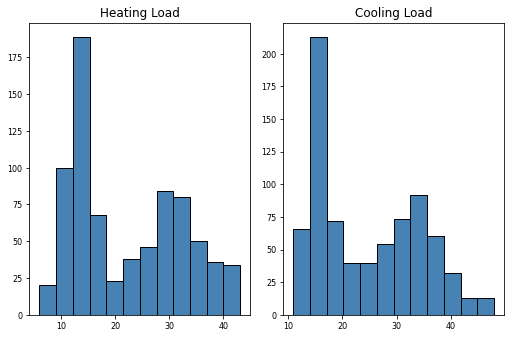

In [ ]:
#histogram of y variables
data[['Heating Load','Cooling Load']].hist(bins=12, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

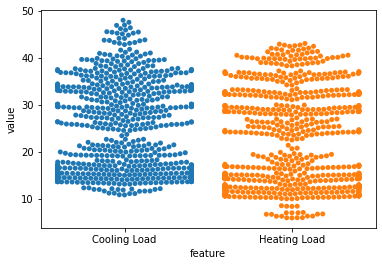

In [ ]:
d=data[['Cooling Load','Heating Load']].stack().rename_axis(('Heating Load','feature')).reset_index(name='value').drop(['Heating Load'], axis=1)
sns.swarmplot(data=d,x="feature",y="value",order=['Cooling Load','Heating Load'])

***Heating Load***\
This is the normalized scatter plot of the 8 variables and 

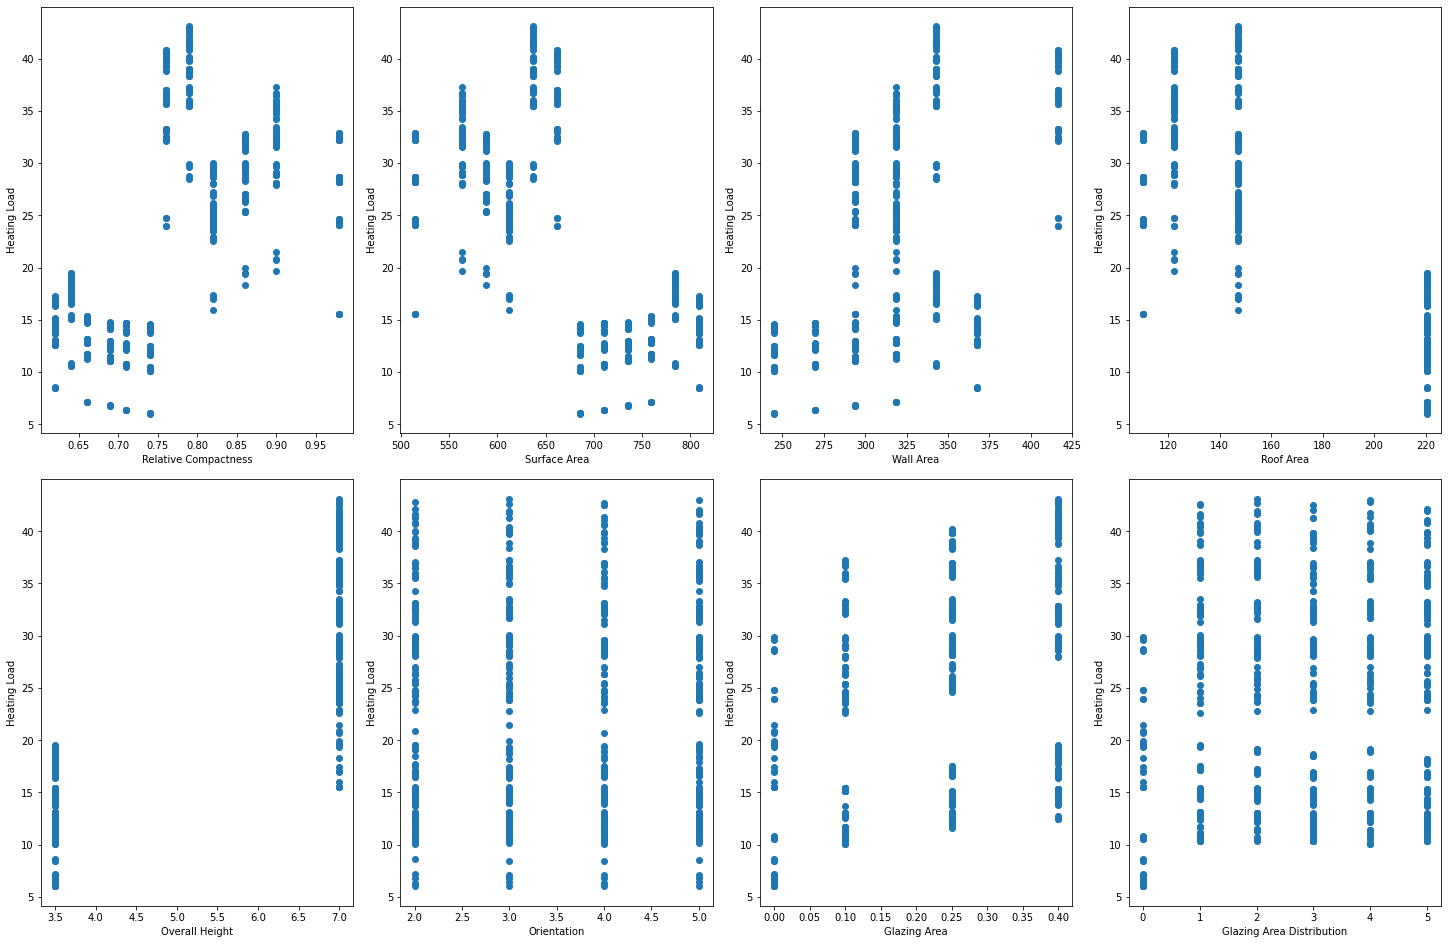

In [ ]:
x=data.drop(['Heating Load','Cooling Load'], axis = 1)
y = data[['Heating Load','Cooling Load']]
fig, axs = plt.subplots(2, 4, constrained_layout=True, figsize=(20, 13))
for i, var_x in enumerate(x):
  row = i//4
  col = i%4
  axs[row, col].scatter(x[[var_x]],y[['Heating Load']])
  axs[row, col].set_xlabel(var_x)
  axs[row, col].set_ylabel('Heating Load')

***Cooling Load***\
This is the normalized scatter plot of the 8 variables and Cooling Load

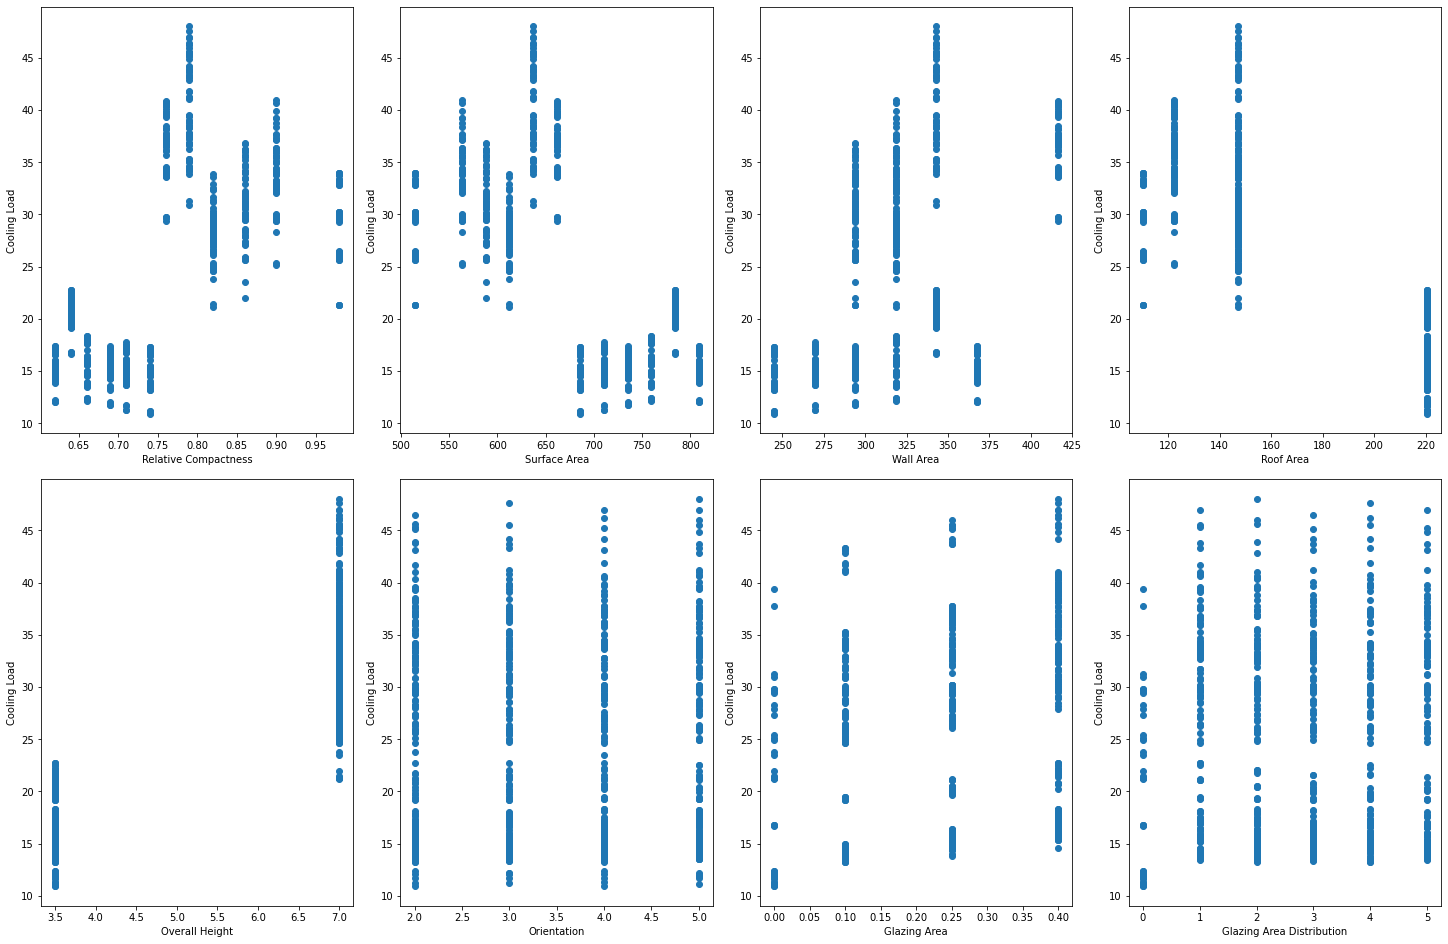

In [ ]:
fig, axs = plt.subplots(2, 4, constrained_layout=True, figsize=(20, 13))
for i, var_x in enumerate(x):
  row = i//4
  col = i%4
  axs[row, col].scatter(x[[var_x]],y[['Cooling Load']])
  axs[row, col].set_xlabel(var_x)
  axs[row, col].set_ylabel('Cooling Load')

***Correlation***\
Heatmap:\
  -*Overall Height* has strong and positive correlation with HL and CL\
  -*Roof Area* has strong and negative correlation with HL and CL

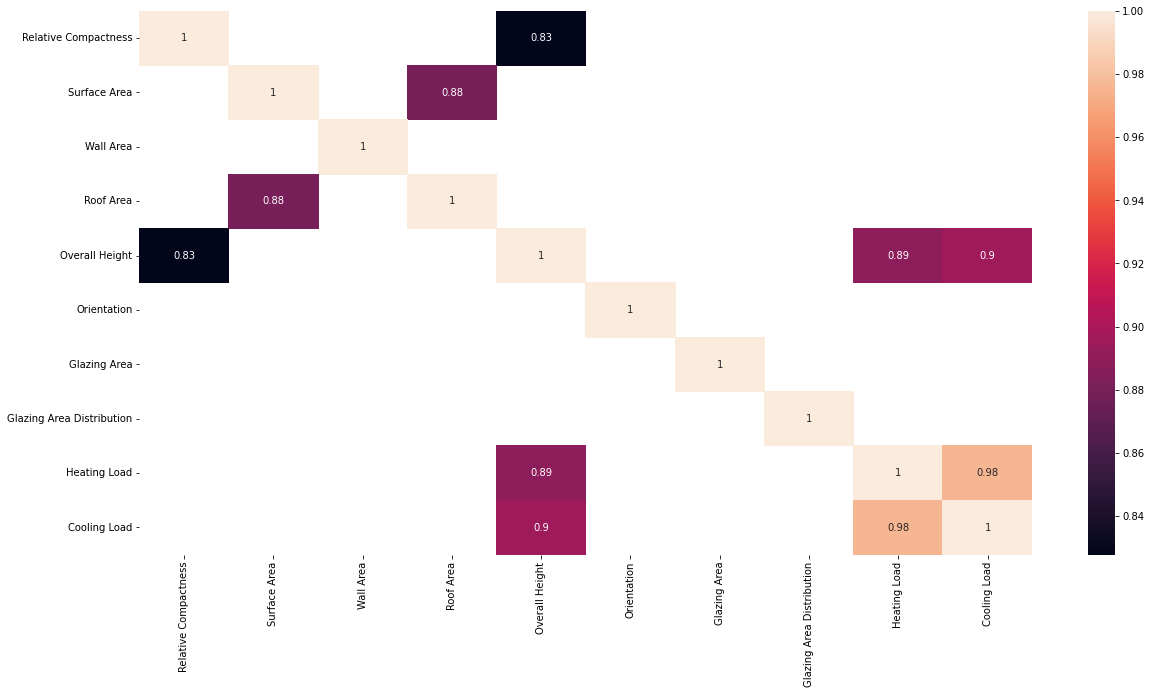

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(d[d > 0.7], annot=True)

In [ ]:
d=data.corr()

In [ ]:
d[d > 0.7]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Relative Compactness,1.000000,NaN,NaN,NaN,0.827747,NaN,NaN,NaN,NaN,NaN
Surface Area,NaN,1.00000,NaN,0.88072,NaN,NaN,NaN,NaN,NaN,NaN
Wall Area,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Roof Area,NaN,0.88072,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN
Overall Height,0.827747,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.889430,0.895785
Orientation,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Glazing Area,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Glazing Area Distribution,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Heating Load,NaN,NaN,NaN,NaN,0.889430,NaN,NaN,NaN,1.000000,0.975862
Cooling Load,NaN,NaN,NaN,NaN,0.895785,NaN,NaN,NaN,0.975862,1.000000


### Variables and classification
8 independent variables\
2 dependent variables\
12 classes


Distribution of numerical features

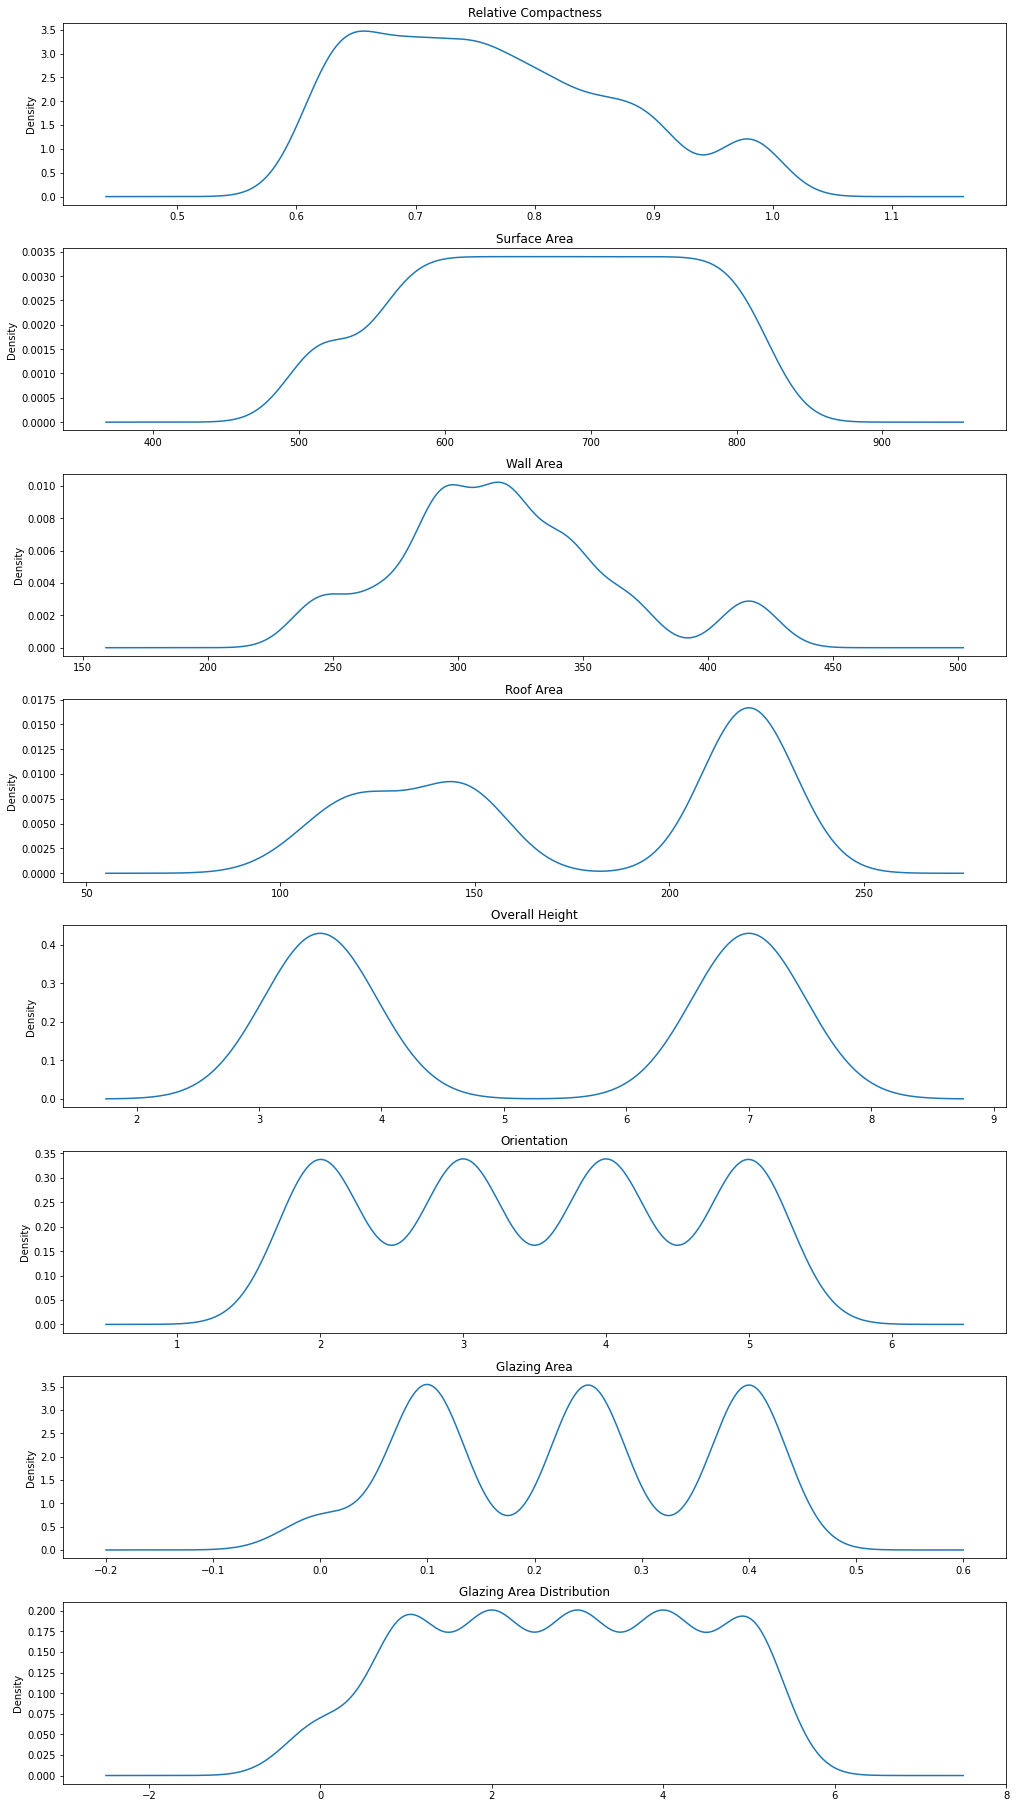

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=1, constrained_layout=True, figsize=(14, 25))
for i,k in enumerate(list(data)[:-2]):
  data[k].plot(ax=axes[i],kind='kde',title=k)

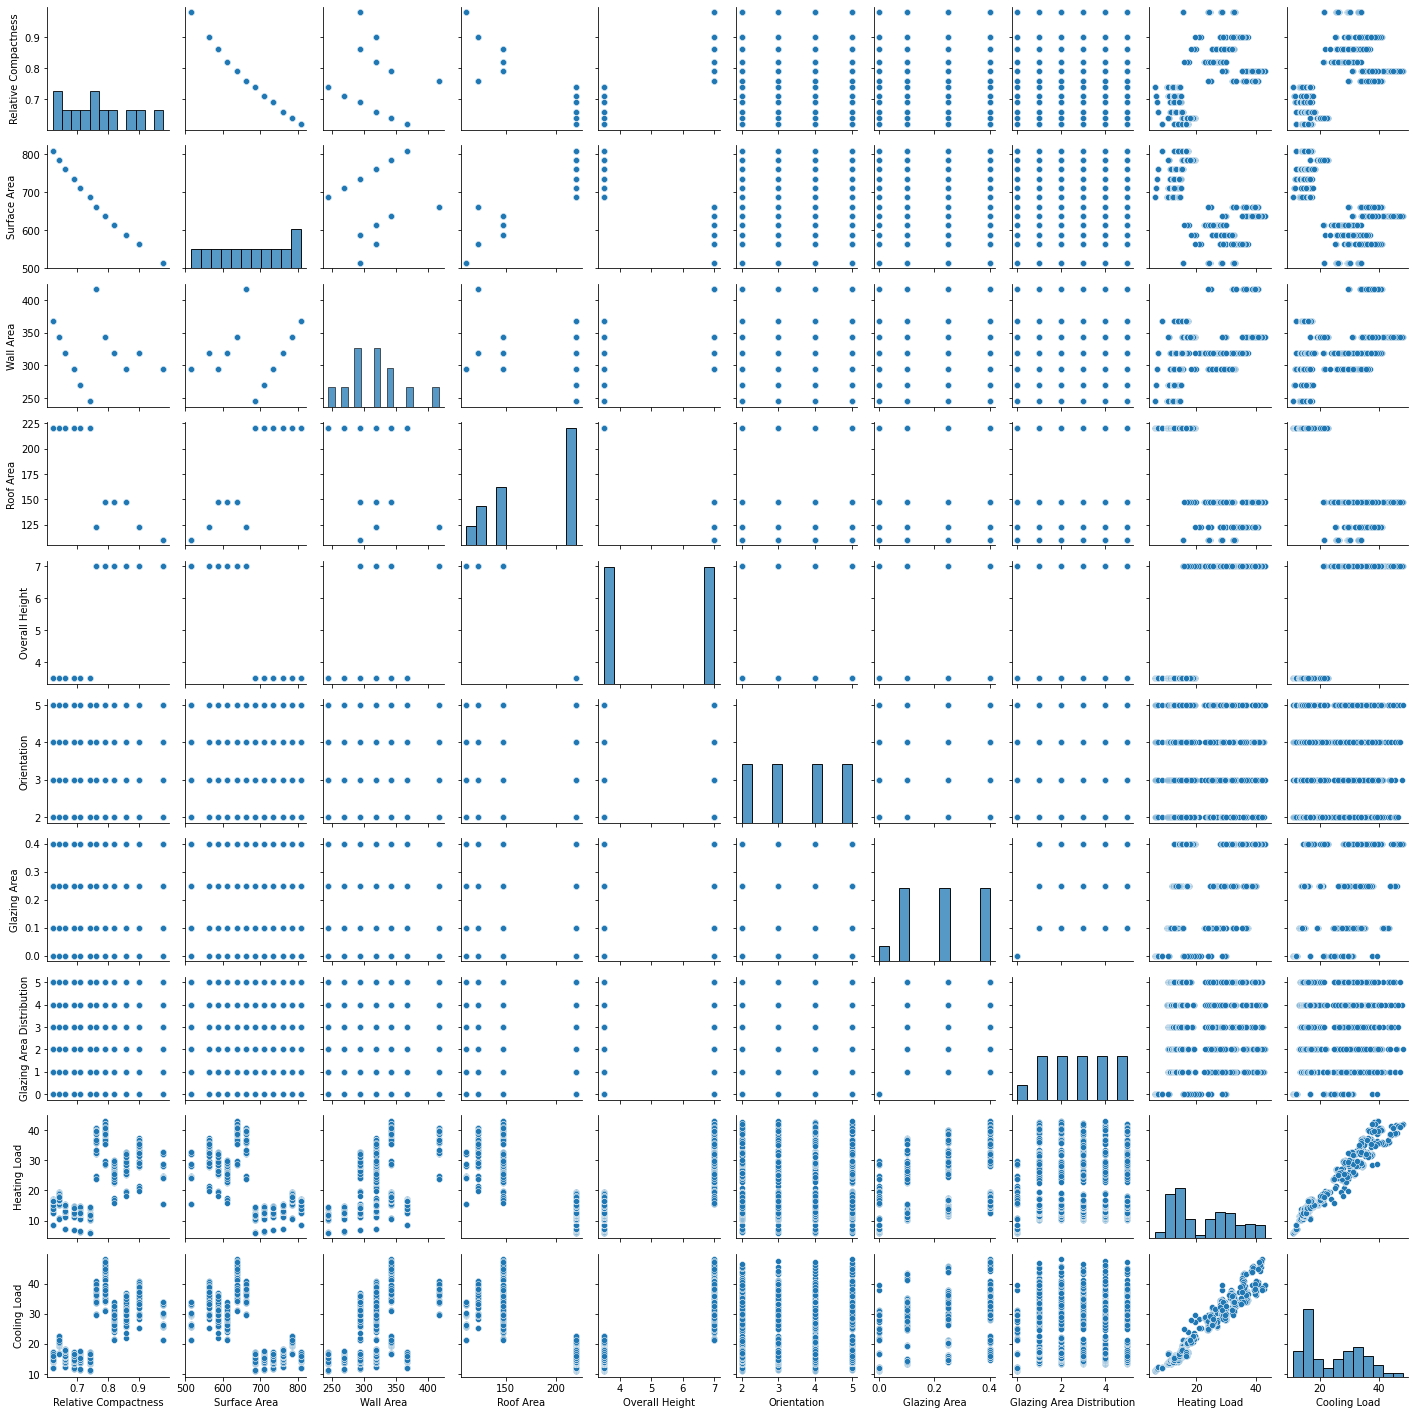

In [ ]:
sns.pairplot(data = data, height = 2)  

# **Data preprocessing**

-Extract the X and Y matrices \
-normalize the Features \

In [ ]:
#clear the missing values
sample1 = data[~data.eq(NA).any(1)]

# get the x matrix and y matrix
x = sample1.drop(['Heating Load','Cooling Load'], axis = 1)
y = sample1[['Heating Load','Cooling Load']]

#normalize the features
x = (x-np.mean(x))/(np.std(x))
x = pd.DataFrame(x, columns = ['Relative Compactness','Surface Area','Wall Area','Roof Area','Overall Height','Orientation','Glazing Area','Glazing Area Distribution',])

## Subsets

-Split the sample into training set and testing set

In [ ]:
#split the training set (80%) and test set(20%)
x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=0.2, random_state=666)

### **Training set**

In [ ]:
x_tr

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
186,-1.174613,1.275625,0.561951,0.972512,-1.0,0.447214,-1.009323,0.120972
64,0.244383,-0.394284,0.561951,-0.655880,1.0,-1.341641,-1.009323,-1.169393
533,1.284979,-1.229239,0.000000,-1.198678,1.0,-0.447214,1.244049,-1.169393
529,2.041777,-1.785875,-0.561951,-1.470077,1.0,-0.447214,1.244049,-1.169393
309,-0.039417,-0.115966,2.247806,-1.198678,1.0,-0.447214,0.117363,-1.169393
...,...,...,...,...,...,...,...,...
445,0.528182,-0.672602,0.000000,-0.655880,1.0,-0.447214,0.117363,0.766154
414,-0.512415,0.440670,-1.123903,0.972512,-1.0,0.447214,0.117363,0.120972
70,-0.039417,-0.115966,2.247806,-1.198678,1.0,0.447214,-1.009323,-1.169393
429,-1.363812,1.553943,1.123903,0.972512,-1.0,-0.447214,0.117363,0.120972


In [ ]:
y_tr

,Heating Load,Cooling Load
186,15.12,19.37
64,35.56,41.68
533,37.24,36.38
529,32.26,33.34
309,36.13,37.58
...,...,...
445,24.96,29.43
414,12.10,15.57
70,32.94,34.14
429,14.34,14.96


### **Testing set**

In [ ]:
x_te

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
639,0.528182,-0.672602,0.000000,-0.655880,1.0,1.341641,1.244049,0.120972
23,-0.039417,-0.115966,2.247806,-1.198678,1.0,1.341641,-1.760447,-1.814575
395,0.906580,-0.950920,-0.561951,-0.655880,1.0,1.341641,0.117363,0.120972
196,1.284979,-1.229239,0.000000,-1.198678,1.0,-1.341641,-1.009323,0.766154
160,0.244383,-0.394284,0.561951,-0.655880,1.0,-1.341641,-1.009323,0.120972
...,...,...,...,...,...,...,...,...
211,0.244383,-0.394284,0.561951,-0.655880,1.0,1.341641,-1.009323,0.766154
434,2.041777,-1.785875,-0.561951,-1.470077,1.0,0.447214,0.117363,0.766154
92,-1.363812,1.553943,1.123903,0.972512,-1.0,-1.341641,-1.009323,-1.169393
666,-1.174613,1.275625,0.561951,0.972512,-1.0,0.447214,1.244049,0.120972


In [ ]:
y_te

,Heating Load,Cooling Load
639,28.91,29.64
23,23.93,29.40
395,29.07,29.82
196,29.06,29.34
160,35.78,43.12
...,...,...
211,37.10,35.29
434,28.15,30.19
92,12.96,14.34
666,18.48,21.54


# **Modeling**

## Linear regression

Create the linear regression model

In [ ]:
class LinearRegression:
  def __init__(self, add_bias=True):
    self.add_bias = add_bias
    pass

  def fit (self, x, y):
    if x.ndim == 1:
      x = x[:, None]
    N = x.shape[0]#num of obs
    if self.add_bias:
      x = np.column_stack([x,np.ones(N)])
    self.w = np.linalg.inv(x.T @ x)@x.T@y
    return self

  def predict(self, x):
    if self.add_bias:
      N = x.shape[0]
      x = np.column_stack([x, np.ones(N)])
    yh = x@self.w
    return yh


In [ ]:
def cost_MSE (model, tr_X, tr_Y, te_X, te_Y, y_string):
  inp_df = model.fit(tr_X, tr_Y).predict(te_X)
  tar_df = te_Y
  inp_tens = inp_df.T.tolist()[0]
  inp_tens = torch.tensor(inp_tens)
  tar_tens = tar_df[[y_string]].to_numpy().T.tolist()[0]
  tar_tens = torch.tensor(tar_tens)
  mse = torch.nn.MSELoss()
  output = mse(inp_tens, tar_tens)
  print('The MSE for ' + y_string + ' = %.3f' % output) 
  return output


Calculating cost

In [ ]:
def lin_cost_fn (model, tr_X, tr_Y, te_X, te_Y):
  yh = model.fit(tr_X, tr_Y).predict(te_X)
  y = te_Y
  tar_diff = y-yh
  tar_diff = tar_diff.to_numpy()
  loss = np.sum(0.5*(np.square(tar_diff)), axis=0)/tar_diff.shape[0]
  return loss

In [ ]:
def lingd_cost_fn (model, optimizer, tr_X, tr_Y, te_X, te_Y):
  yh = model.fit(tr_X, tr_Y, optimizer).predict(te_X)
  y = te_Y
  tar_diff = y-yh
  tar_diff = tar_diff.to_numpy()
  loss = np.sum(0.5*(np.square(tar_diff)), axis=0)/tar_diff.shape[0]
  return loss

In [ ]:
def yh_cost_fn (yh, te_Y):
  tar_diff = te_Y-yh
  tar_diff = tar_diff.to_numpy()
  loss = np.sum(0.5*(np.square(tar_diff)),axis=0)/tar_diff.shape[0]
  return loss

The result for linear regression 

In [ ]:
linear_model = LinearRegression()
yh_te = linear_model.fit(x_tr, y_tr).predict(x_te)
weights = linear_model.fit(x_tr, y_tr).w
yh_tr = linear_model.fit(x_tr, y_tr).predict(x_tr)
r_R2_te = np.mean(r2_score(y_te, yh_te))
r_R2_tr = np.mean(r2_score(y_tr, yh_tr))
cost_te = yh_cost_fn(yh_te.to_numpy(), y_te)
cost_tr = yh_cost_fn(yh_tr.to_numpy(), y_tr)
print(r_R2_te)
print(r_R2_tr)
print(cost_te)
print(cost_tr)



0.8861470390316775
0.9053262492716274
[4.31999887 5.57137935]
[4.25719948 4.95670336]


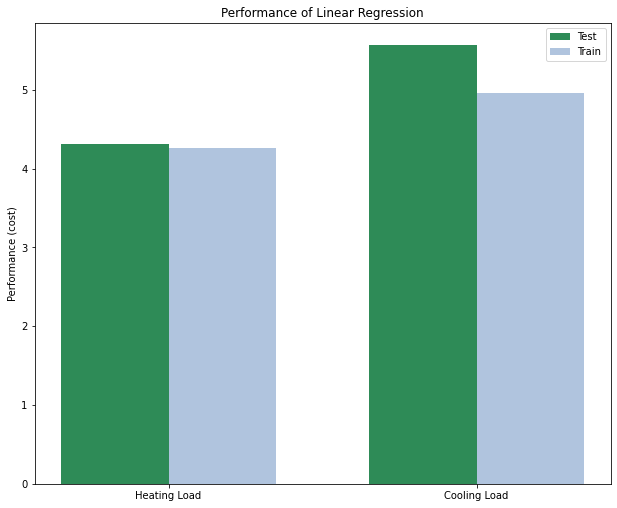

In [ ]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
xlabel = ["Heating Load", "Cooling Load"]
width = 0.35
bar_test = [cost_te[0], cost_te[1]]
bar_train = [cost_tr[0], cost_tr[1]]
rects1 = ax.bar(np.arange(len(xlabel)), bar_test, width=0.35, color='seagreen')
rects2 = ax.bar(np.arange(len(xlabel))+width, bar_train, width = 0.35, color='lightsteelblue')
ax.set_ylabel('Performance (cost)')
ind = np.arange(len(xlabel))
ax.set_xticks(ind + width / 2)
ax.set_title('Performance of Linear Regression')
ax.set_xticklabels(('Heating Load', 'Cooling Load'))
ax.legend((rects1[0], rects2[0]), ('Test', 'Train'))
plt.savefig('Performance (cost) of Linear Regression.png')
plt.show()


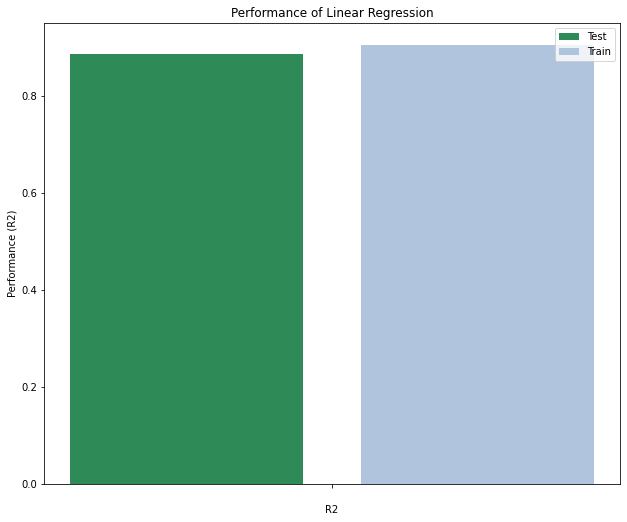

In [ ]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
xlabel = ["R2"]
width = 0.25
bar_test = [r_R2_te]
bar_train = [r_R2_tr]
rects1 = ax.bar(np.arange(len(xlabel)), bar_test, width=0.2, color='seagreen')
rects2 = ax.bar(np.arange(len(xlabel))+width, bar_train, width = 0.2, color='lightsteelblue')
ax.set_ylabel('Performance (R2)')
ind = np.arange(len(xlabel))
ax.set_xlabel("R2")
ax.set_xticks(ind + width / 2)
ax.set_title('Performance of Linear Regression')
ax.set_xticklabels(" ")
ax.legend((rects1[0], rects2[0]), ('Test', 'Train'))
plt.savefig('Performance (R2) of Linear Regression.png')
plt.show()


### Weight Space

In [ ]:
weights

,Heating Load,Cooling Load
0,-7.375310,-8.019792
1,-9.175629,-9.798465
2,3.128260,2.686447
3,1.205493,1.764034
4,7.508334,7.757159
5,-0.043767,0.116185
6,2.709908,2.005080
7,0.370599,0.096161
8,22.295060,24.610579


Weights for Heating Load

In [ ]:
# weights under closed form
x_copy = x.copy()
x_copy.insert(8,'bias',1)

np.linalg.inv(x_copy.T @ x_copy) @ x_copy.T @ y

,Heating Load,Cooling Load
0,-7.234585,-7.867431
1,-11.055614,-12.454002
2,4.372001,4.292482
3,3.321417,4.673486
4,7.297419,7.496726
5,-0.026084,0.135853
6,2.653721,1.959339
7,0.315844,0.063079
8,22.307195,24.587760


## Linear regression with grdient descent

In [ ]:
class GradientDescent:
    
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)               # compute the gradient with present weight        
            w = w - self.learning_rate * grad         # weight update step
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w

In [ ]:
class LinearRegression_gd:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
            
    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
            

        N,D = x.shape
        N1, D1 = y.shape
        def gradient(x, y, w):                          # define the gradient function
            yh =  x @ w 
            N, D = x.shape
            grad = np.dot(x.T, yh-y)/N
            return grad
        w0 = np.zeros((D, D1))  ## 9*2                          # initialize the weights to 0
        self.w = optimizer.run(gradient, x, y, w0)      # run the optimizer to get the optimal weights
        return self
    
    def predict(self, x):
        if self.add_bias:
          N, D = x.shape
          x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

In [ ]:
optimizer = GradientDescent(learning_rate=.2, max_iters=3000, record_history=True)
model1 = LinearRegression_gd()
gd_yh = model1.fit(x_tr,y_tr, optimizer).predict(x_te)

In [ ]:
model1.fit(x_tr,y_tr, optimizer).w

array([[-6.67536104, -7.29767233],
       [-3.52152031, -3.68628308],
       [ 0.6946641 ,  0.05069569],
       [-3.76946345, -3.61912051],
       [ 7.63048191,  7.88824243],
       [-0.04327732,  0.11671096],
       [ 2.71027642,  2.00547552],
       [ 0.37046595,  0.09601762],
       [22.29536588, 24.61090715]])

In [ ]:
cost = yh_cost_fn(gd_yh, y_te)
print(cost)

[4.30870532 5.55930873]


In [ ]:
gd_yh = pd.DataFrame(gd_yh, columns = ["gd_yh1", "gd_yh2"])
gd_yh

,gd_yh1,gd_yh2
0,34.599415,36.160875
1,31.175587,34.118215
2,29.609571,32.137375
3,27.801661,29.884081
4,29.913004,32.402226
...,...,...
149,30.035897,32.777343
150,28.318845,29.835196
151,12.300765,15.191345
152,18.135407,19.659860


In [ ]:
r_2 = np.mean(r2_score(y_te, gd_yh))
print(r_2)

0.8864147440870263


## Linear model with Adams Batch

In [ ]:
class Adams_GradientDescent:
    
    def __init__(self, learning_rate=.001, beta1=0.999, beta2=0.9, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        self.beta1 = beta1
        self.beta2 = beta2
        if record_history:
            self.w_history = []                 #to store the weight history for visualization
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        N,D = x.shape
        N1, D1 = y.shape

        momentum = np.zeros((D, D1))
        V = np.zeros((D, D1))

        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)
            V = V*self.beta1 + (1-self.beta1)*grad**2 ### w??
            momentum = momentum*self.beta2 + (1-self.beta2)*grad         # compute the gradient with present weight
            V_hat = V / (1-np.power(self.beta1,t)) ### t+1??
            momentum_hat = momentum / (1-np.power(self.beta2,t)) ## t+1?
            new_grad = self.learning_rate/(np.sqrt(V_hat)+self.epsilon)*momentum_hat #(np.sqrt(V_hat+self.epsilon)) ?
            w = w-new_grad
            w = w - self.learning_rate * grad         # weight update step
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w

In [ ]:
class Adams_LinearRegression_gd:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
            
    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        N1, D1 = y.shape
        def gradient(x, y, w):                          # define the gradient function
            yh =  x @ w 
            N, D = x.shape
            grad = np.dot(x.T, yh-y)/N
            return grad
        w0 = np.zeros((D, D1))  ## 9*2                            # initialize the weights to 0
        self.w = optimizer.run(gradient, x, y, w0)      # run the optimizer to get the optimal weights
        return self
    
    def predict(self, x):
        if self.add_bias:
          N, D = x.shape
          x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

In [ ]:
optimizer = Adams_GradientDescent(learning_rate=.05, max_iters=3000, epsilon=1e-9, record_history=True)
model1 = Adams_LinearRegression_gd()
gd_yh = model1.fit(x_tr,y_tr, optimizer).predict(x_te)

In [ ]:
model1.fit(x_tr,y_tr, optimizer).w

array([[-6.91540338, -7.56139051],
       [-4.04976052, -4.20467769],
       [ 0.83521487,  0.17442904],
       [-3.57412406, -3.46820564],
       [ 7.52597449,  7.77325975],
       [-0.04369565,  0.11625046],
       [ 2.70995366,  2.00512207],
       [ 0.37058117,  0.09614419],
       [22.29510431, 24.61061942]])

In [ ]:
cost = yh_cost_fn(gd_yh, y_te)
print(cost)

[4.3080887  5.55831831]


In [ ]:
gd_yh = pd.DataFrame(gd_yh, columns = ["gd_yh1", "gd_yh2"])
gd_yh

,gd_yh1,gd_yh2
0,34.594087,36.154963
1,31.223118,34.170461
2,29.581812,32.106816
3,27.804602,29.887342
4,29.909614,32.398442
...,...,...
149,30.031459,32.772405
150,28.301050,29.815721
151,12.260216,15.146803
152,18.116151,19.638713


In [ ]:
r_2 = np.mean(r2_score(y_te, gd_yh))
print(r_2) ## increaed by 0.0015?

0.886433337424793


## Linear model with SGD Version 2

In [ ]:
def create_mini_batches(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
 
    for i in range(n_minibatches):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-2]
        Y_mini = mini_batch[:, -2:]
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-2]
        Y_mini = mini_batch[:, -2:]

        mini_batches.append((X_mini, Y_mini))
    return mini_batches



In [ ]:
class mini_SGD:
    
    def __init__(self, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization

            
    def run(self, gradient_fn, x, y, w, size):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            
            mini_batches = create_mini_batches(x, y, size)
            for mini_batch in mini_batches:
                X_mini, y_mini = mini_batch

                grad = gradient_fn(X_mini, y_mini, w)               # compute the gradient with present weight

                self.w_history.append(w)
                w = w - pow(t, -0.51) * grad         # weight update step #maybe change the learning rate?
                if self.record_history:
                    self.w_history.append(w)

            t += 1


        return w

In [ ]:
class LR_mini:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
            
    def fit(self, x, y, optimizer,size):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        N1, D1 = y.shape
        def gradient(x, y, w):                          # define the gradient function
            yh =  x @ w 
            N, D = x.shape
            grad = np.dot(x.T, yh-y)/N
            return grad
        w0 = np.zeros((D, D1))  ## 9*2                              # initialize the weights to 0
        self.w = optimizer.run(gradient, x, y, w0,size)      # run the optimizer to get the optimal weights
        return self
    
    def predict(self, x):
        if self.add_bias:
          N, D = x.shape
          x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

In [ ]:
optimizer2 = mini_SGD(max_iters=10000, record_history=True)
model2 = LR_mini()
gd_yh = model2.fit(x_tr,y_tr, optimizer2,128).predict(x_te)

In [ ]:
model2.fit(x_tr,y_tr, optimizer2,128).w

array([[-6.79435462, -7.45608731],
       [-3.61745925, -3.81648045],
       [ 0.68605136,  0.03677142],
       [-3.85885762, -3.73935615],
       [ 7.58073764,  7.82110926],
       [-0.04261808,  0.11725195],
       [ 2.70704239,  2.00658141],
       [ 0.36903642,  0.10009268],
       [22.30071684, 24.62053455]])

In [ ]:
cost = yh_cost_fn(gd_yh, y_te)
print(cost)

[4.31231724 5.55954508]


In [ ]:
gd_yh = pd.DataFrame(gd_yh, columns = ["gd_yh1", "gd_yh2"])
gd_yh

,gd_yh1,gd_yh2
0,34.592033,36.143053
1,31.156656,34.114181
2,29.591856,32.110013
3,27.821360,29.908347
4,29.915632,32.410182
...,...,...
149,30.015959,32.756403
150,28.330226,29.837406
151,12.274927,15.163970
152,18.120013,19.632125


In [ ]:
r_2 = np.mean(r2_score(y_te, gd_yh))
print(r_2) 

0.8863726192221908


## Linear model with SGD Version 1

In [ ]:
class SGD:
    
    def __init__(self, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        k=0
        self.w_history = []
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            k+=1
            grad = gradient_fn(x, y, w)               # compute the gradient with present weight
            w = w - pow(t, -0.51) * grad         # weight update step
            if self.record_history:
                self.w_history.append(w)
            t += 1
        print(k)
        return w

In [ ]:
class LinearRegression_minisgd:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
            
    def fit(self, x, y, optimizer, size):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        N1, D1 = y.shape
        def gradient(x, y, w):    # define the gradient function
            x_df = pd.DataFrame(x)
            N3,D3 = x_df.shape
            y = y.reset_index()
            y.pop(y.columns[0])
            #if the batch is always the same
            xy = pd.concat([x_df, y], axis=1)
            xymini = xy.sample(n = size, random_state = size)
            xmini = xymini[xymini.columns[:D3]]
            ymini = xymini[xymini.columns[D3:]]
            yhmini = xmini@w
            N2, D2 = xmini.shape
            yhmini = yhmini.to_numpy()
            ymini = ymini.to_numpy()
            grad = np.dot(xmini.T, yhmini-ymini)/N2
            return grad
        w0 = np.zeros((D, D1))                                # initialize the weights to 0
        self.w = optimizer.run(gradient, x, y, w0)      # run the optimizer to get the optimal weights
        return self
    
    def predict(self, x):
        if self.add_bias:
          N, D = x.shape
          x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

In [ ]:
optimizer = SGD(max_iters=10, record_history=True)
model1 = LinearRegression_minisgd()
sgd_yh = model1.fit(x_tr ,y_tr ,optimizer ,128).predict(x_te)

w_hist_y1=[]
for i in range(9):
    w_hist_y1.append([x[0] for x in optimizer.w_history[i]])

print(w_hist_y1)    





9
[[7.218560784466378, -7.5881327474476, 4.023221426875615, -9.342526090719389, 9.247265625000002, -0.7850345529131686, 0.4896811628414382, -3.017433682613975, 22.02585937500001], [-10.034791393173675, 9.46315802967764, 1.9493384949444912, 8.286442033176627, -7.47249384357948, 0.0447501855891147, 3.234507125598658, 3.006847126275089, 21.009894121550296], [12.728362008231167, -13.42875709485319, 5.1284371256696915, -15.571716260476595, 15.780957151166055, -0.6338395294192197, 1.7622975409164323, -2.7888390626195485, 22.942458324825555], [-10.209552222642843, 9.41260921915666, 1.903266865435901, 8.25940058615286, -7.075489868481251, -0.10663037207057846, 3.456216138526935, 3.217359197735312, 21.394554545151717], [7.239175619154691, -8.128302972128036, 4.31858616951334, -10.011915545217825, 10.720849624121987, -0.5751118991698368, 2.2289640905518664, -1.3268732328971296, 22.731750451497973], [-3.4011402573300167, 2.435735834369966, 2.80644215815457, 1.0197871650386148, 0.1907089001977358,

In [ ]:
model1.fit(x_tr ,y_tr ,optimizer ,128).w

9


array([[ 0.07988311,  0.0512219 ],
       [-1.2442625 , -1.27076942],
       [ 3.22281226,  2.73564763],
       [-2.7698101 , -2.56037814],
       [ 4.17006612,  4.1163296 ],
       [-0.43123039, -0.18459043],
       [ 2.74572915,  1.83059909],
       [ 0.48727455,  0.17600843],
       [22.30390982, 24.59925188]])

In [ ]:
cost = yh_cost_fn(sgd_yh, y_te)
print(cost)

[5.32086365 6.51096672]


In [ ]:
sgd_yh = pd.DataFrame(sgd_yh, columns = ["sgd_yh1", "sgd_yh2"])
sgd_yh

,sgd_yh1,sgd_yh2
0,32.065939,33.327653
1,30.883023,34.289495
2,27.537828,30.100902
3,29.606786,31.947386
4,28.477994,30.867027
...,...,...
149,27.635263,30.485276
150,31.622668,33.583394
151,14.257253,17.217131
152,18.852106,20.065129


In [ ]:
y_te

,Heating Load,Cooling Load
639,28.91,29.64
23,23.93,29.40
395,29.07,29.82
196,29.06,29.34
160,35.78,43.12
...,...,...
211,37.10,35.29
434,28.15,30.19
92,12.96,14.34
666,18.48,21.54


In [ ]:
r_2 = np.mean(r2_score(y_te, sgd_yh))
print(r_2)  

0.8639841603066729


# Task 3.3: Performance and Training size

###Cost function: Linear model

In [ ]:
#Performance of Linear Model: test
lin_cte_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  yh = linear_model.fit(x_tr, y_tr).predict(x_te)
  cost = yh_cost_fn(yh.to_numpy(), y_te)
  lin_cte_list.append(cost)
lin_cte_list = lin_cte_list[::-1]

lin_cte_list


[array([7.24571204, 7.7786979 ]),
 array([5.12497935, 5.93948869]),
 array([183.76083384, 177.38442067]),
 array([5.72518318, 6.20763548]),
 array([5.17384407, 5.81633428]),
 array([5.65717687, 6.28498992]),
 array([26.31867915, 23.05111819])]

In [ ]:
lin_cte_list_y1 = [x[0] for x in lin_cte_list]
lin_cte_list_y2 = [x[1] for x in lin_cte_list]

In [ ]:
#Performance of Linear Model: train
lin_ctr_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  yh = linear_model.fit(x_tr, y_tr).predict(x_tr)
  cost = yh_cost_fn(yh.to_numpy(), y_tr)
  lin_ctr_list.append(cost)
lin_ctr_list = lin_ctr_list[::-1]

lin_ctr_list

[array([6.60222515, 7.05758013]),
 array([4.20699042, 5.031131  ]),
 array([164.76876151, 161.73918568]),
 array([5.48362014, 6.22314258]),
 array([4.77522821, 5.57302707]),
 array([5.44551029, 6.48918638]),
 array([25.99092123, 23.97781352])]

In [ ]:
lin_ctr_list_y1 = [x[0] for x in lin_ctr_list]
lin_ctr_list_y2 = [x[1] for x in lin_ctr_list]

###Cost function: Lnear model with gd

In [ ]:
#Performance of Linear Model with GD: test
lingd_cte_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  optimizer = GradientDescent(learning_rate=.05, max_iters=10000, record_history=True)
  model = LinearRegression_gd()
  yh=model.fit(x_tr, y_tr, optimizer).predict(x_te)
  cost = lingd_cost_fn(model, optimizer, x_tr, y_tr, x_te, y_te)
  lingd_cte_list.append(cost)
lingd_cte_list = lingd_cte_list[::-1]

lingd_cte_list

[array([4.63381113, 5.65215997]),
 array([4.63577186, 5.43585136]),
 array([4.59218415, 5.60869848]),
 array([4.42266244, 5.26407278]),
 array([4.57333271, 5.34250739]),
 array([4.38248696, 4.71807058]),
 array([4.00072147, 4.13110099])]

In [ ]:
lingd_cte_list_y1 = [x[0] for x in lingd_cte_list]
lingd_cte_list_y2 = [x[1] for x in lingd_cte_list]

In [ ]:
#Performance of Linear Model with GD: train
lingd_ctr_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  optimizer = GradientDescent(learning_rate=.05, max_iters=10000, record_history=True)
  model = LinearRegression_gd()
  yh=model.fit(x_tr, y_tr, optimizer).predict(x_tr)
  cost = lingd_cost_fn(model, optimizer, x_tr, y_tr, x_tr, y_tr)
  lingd_ctr_list.append(cost)
lingd_ctr_list = lingd_ctr_list[::-1]
lingd_ctr_list

[array([3.36621943, 4.01472128]),
 array([3.93557333, 4.76783925]),
 array([4.02682455, 4.4901983 ]),
 array([4.16947059, 4.97893325]),
 array([4.0711404 , 4.92926487]),
 array([4.21587164, 5.23180369]),
 array([4.32851897, 5.31285466])]

In [ ]:
lingd_ctr_list_y1 = [x[0] for x in lingd_ctr_list]
lingd_ctr_list_y2 = [x[1] for x in lingd_ctr_list]

### Cost function: Linear model with Adams Batch

In [ ]:
##Performance of Linear Model with Adams Batch: test
linadam_cte_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  optimizer = Adams_GradientDescent(learning_rate=.05, max_iters=10000, epsilon=1e-9, record_history=True)
  model1 = Adams_LinearRegression_gd()
  yh = model1.fit(x_tr,y_tr, optimizer).predict(x_te)
  cost = yh_cost_fn(yh, y_te)
  linadam_cte_list.append(cost)
linadam_cte_list = linadam_cte_list[::-1]
linadam_cte_list

[array([4.64471304, 5.65777035]),
 array([4.63857196, 5.44289648]),
 array([4.58597153, 5.60138617]),
 array([4.42166216, 5.25959773]),
 array([4.57882824, 5.34383449]),
 array([4.3861418 , 4.72027553]),
 array([4.00505725, 4.13355687])]

In [ ]:
linadam_cte_list_y1 = [x[0] for x in linadam_cte_list]
linadam_cte_list_y2 = [x[1] for x in linadam_cte_list]

In [ ]:
##Performance of Linear Model with Adams Batch: train
linadam_ctr_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  optimizer = Adams_GradientDescent(learning_rate=.05,max_iters=10000, epsilon=1e-9, record_history=True)
  model1 = Adams_LinearRegression_gd()
  yh = model1.fit(x_tr,y_tr, optimizer).predict(x_tr)
  cost = yh_cost_fn(yh, y_tr)
  linadam_ctr_list.append(cost)
linadam_ctr_list = linadam_ctr_list[::-1]
linadam_ctr_list

[array([3.36456558, 4.01312314]),
 array([3.93429486, 4.76599624]),
 array([4.02616298, 4.48941896]),
 array([4.16833758, 4.97778589]),
 array([4.069837  , 4.92794097]),
 array([4.2147434 , 5.23055701]),
 array([4.32743245, 5.31164848])]

In [ ]:
linadam_ctr_list_y1 = [x[0] for x in linadam_ctr_list]
linadam_ctr_list_y2 = [x[1] for x in linadam_ctr_list]

### Cost function: Linear model with SGD Version 1

In [ ]:
#Performance of Linear model with Sgd Version 1: test
linSGD1_cte_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  optimizer = SGD(max_iters=10000, record_history=True)
  model1 = LinearRegression_minisgd()
  yh = model1.fit(x_tr ,y_tr ,optimizer ,128).predict(x_te)
  cost = yh_cost_fn(yh, y_te)
  linSGD1_cte_list.append(cost)
linSGD1_cte_list = linSGD1_cte_list[::-1]
linSGD1_cte_list

9999
9999
9999
9999
9999
9999
9999


[array([4.77918908, 5.76846849]),
 array([4.56770113, 5.45326986]),
 array([4.54716935, 5.65859922]),
 array([4.48852879, 5.51210904]),
 array([4.54620813, 5.29621879]),
 array([4.70894093, 5.24503202]),
 array([4.20333324, 4.27237616])]

In [ ]:
linSGD1_cte_list_y1 = [x[0] for x in linSGD1_cte_list]
linSGD1_cte_list_y2 = [x[1] for x in linSGD1_cte_list]

In [ ]:
#Performance of Linear model with Sgd Version 1: train
linSGD1_ctr_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  optimizer = SGD(max_iters=10000, record_history=True)
  model1 = LinearRegression_minisgd()
  yh = model1.fit(x_tr, y_tr, optimizer, 128).predict(x_tr)
  cost = yh_cost_fn(yh, y_tr)
  linSGD1_ctr_list.append(cost)
linSGD1_ctr_list = linSGD1_ctr_list[::-1]
linSGD1_ctr_list

9999
9999
9999
9999
9999
9999
9999


[array([3.43359481, 4.04783685]),
 array([3.9836168 , 4.80550836]),
 array([4.16636307, 4.64046239]),
 array([4.32002674, 5.16178696]),
 array([4.2829168 , 5.12617726]),
 array([4.72594978, 5.88094648]),
 array([4.46356215, 5.39446333])]

In [ ]:
linSGD1_ctr_list_y1 = [x[0] for x in linSGD1_ctr_list]
linSGD1_ctr_list_y2 = [x[1] for x in linSGD1_ctr_list]

### Cost function: Linear model with SGD Version 2

In [ ]:
#Performance of Linear model with Sgd Version 2: test
linSGD2_cte_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  optimizer2 = mini_SGD(max_iters=10000, record_history=True)
  model2 = LR_mini()
  yh = model2.fit(x_tr,y_tr, optimizer2,128).predict(x_te)
  cost = yh_cost_fn(yh, y_te)
  linSGD2_cte_list.append(cost)
linSGD2_cte_list = linSGD2_cte_list[::-1]
linSGD2_cte_list

[array([4.62794005, 5.65506323]),
 array([4.63289929, 5.43743267]),
 array([4.58496821, 5.60190439]),
 array([4.42374192, 5.26336565]),
 array([4.61257873, 5.3632188 ]),
 array([4.3850094 , 4.71919174]),
 array([4.16296624, 4.2641394 ])]

In [ ]:
linSGD2_cte_list_y1 = [x[0] for x in linSGD2_cte_list]
linSGD2_cte_list_y2 = [x[1] for x in linSGD2_cte_list]

In [ ]:
#Performance of Linear model with Sgd Version 2: train
linSGD2_ctr_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  optimizer2 = mini_SGD(max_iters=10000, record_history=True)
  model2 = LR_mini()
  yh = model2.fit(x_tr,y_tr, optimizer2,128).predict(x_tr)
  cost = yh_cost_fn(yh, y_tr)
  linSGD2_ctr_list.append(cost)
linSGD2_ctr_list = linSGD2_ctr_list[::-1]
linSGD2_ctr_list

[array([3.37055188, 4.01899955]),
 array([3.93893966, 4.77246333]),
 array([4.02648034, 4.4896949 ]),
 array([4.17035811, 4.97962951]),
 array([4.07433599, 4.93259542]),
 array([4.21483557, 5.23077688]),
 array([4.33450534, 5.31793275])]

In [ ]:
linSGD2_ctr_list_y1 = [x[0] for x in linSGD2_ctr_list]
linSGD2_ctr_list_y2 = [x[1] for x in linSGD2_ctr_list]

### Plot1: Performance (Cost) of Linear models with or without GD on both sets (y1 and y2)

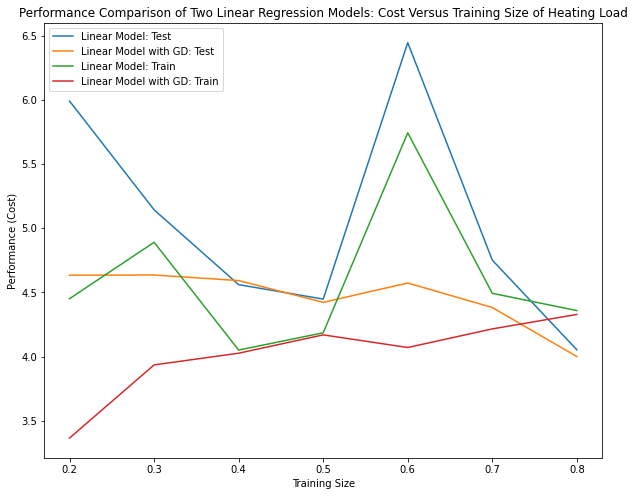

In [ ]:
xaxis = np.arange(0.2, 0.8, 0.1).tolist()
plt.figure(figsize=(10,8))
plt.plot(xaxis, lin_cte_list_y1, label = 'Linear Model: Test')
plt.plot(xaxis, lingd_cte_list_y1, label = 'Linear Model with GD: Test')
plt.plot(xaxis, lin_ctr_list_y1, label = 'Linear Model: Train')
plt.plot(xaxis, lingd_ctr_list_y1, label = 'Linear Model with GD: Train')
plt.xlabel("Training Size")
plt.ylabel("Performance (Cost)")
plt.title("Performance Comparison of Two Linear Regression Models: Cost Versus Training Size of Heating Load")

plt.legend()
plt.show()

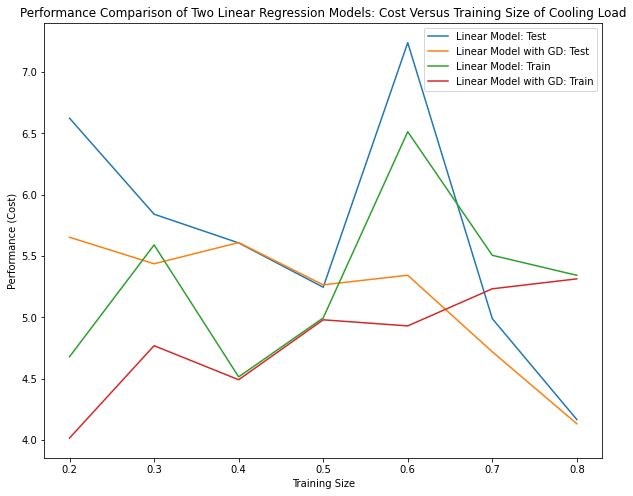

In [ ]:
xaxis = np.arange(0.2, 0.8, 0.1).tolist()
plt.figure(figsize=(10,8))
plt.plot(xaxis, lin_cte_list_y2, label = 'Linear Model: Test')
plt.plot(xaxis, lingd_cte_list_y2, label = 'Linear Model with GD: Test')
plt.plot(xaxis, lin_ctr_list_y2, label = 'Linear Model: Train')
plt.plot(xaxis, lingd_ctr_list_y2, label = 'Linear Model with GD: Train')
plt.xlabel("Training Size")
plt.ylabel("Performance (Cost)")
plt.title("Performance Comparison of Two Linear Regression Models: Cost Versus Training Size of Cooling Load")

plt.legend()
plt.show()

### Plot2.1: Performance (Cost) of different Linear models on Testing set (y1)

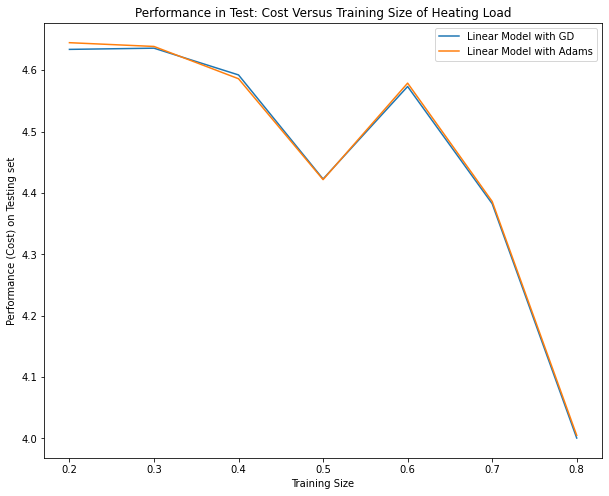

In [ ]:
#Performance of each model on testing set
xaxis = np.arange(0.2, 0.8, 0.1).tolist()
f1 = plt.figure(figsize=(10,8))
plt.plot(xaxis, lin_cte_list_y1, label = 'Linear Model')
plt.plot(xaxis, lingd_cte_list_y1, label = 'Linear Model with GD')
plt.plot(xaxis, linadam_cte_list_y1, label = 'Linear Model with Adams')
plt.plot(xaxis, linSGD1_cte_list_y1, label = 'Linear Model with SGD non-random mini-batch')
plt.plot(xaxis, linSGD2_cte_list_y1, label = 'Linear Model with SGD random mini-batch')
plt.xlabel("Training Size")
plt.ylabel("Performance (Cost) on Testing set")
plt.title("Performance in Test: Cost Versus Training Size of Heating Load")

plt.legend()
plt.show()

### Plot2.2: Performance (Cost) of different Linear models on Training set (y1)

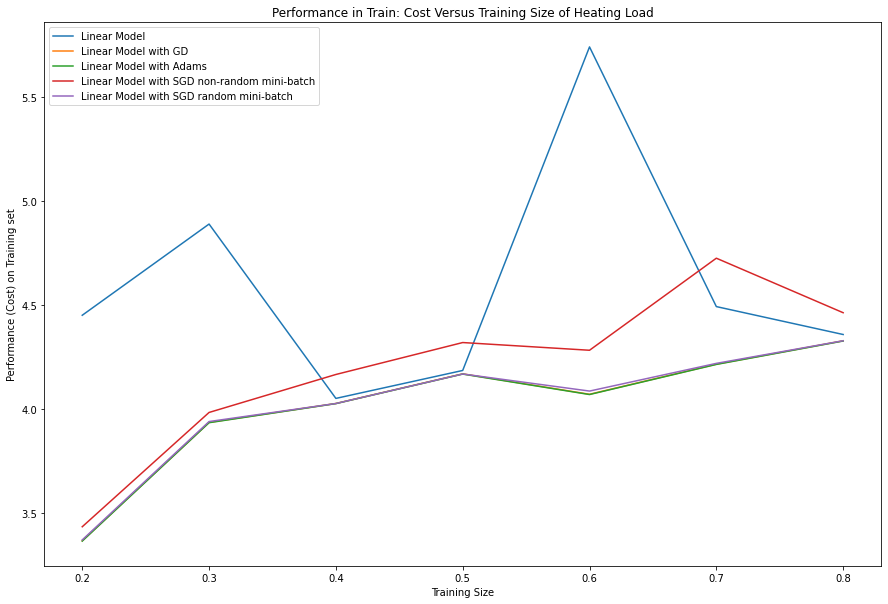

In [ ]:
#Performance of each model on training set
xaxis = np.arange(0.2, 0.8, 0.1).tolist()
plt.figure(figsize=(15,10))
# plt.plot(xaxis, lin_ctr_list_y1, label = 'Linear Model')
plt.plot(xaxis, lingd_ctr_list_y1, label = 'Linear Model with GD')
plt.plot(xaxis, linadam_ctr_list_y1, label = 'Linear Model with Adams')
plt.plot(xaxis, linSGD1_ctr_list_y1, label = 'Linear Model with SGD non-random mini-batch')
plt.plot(xaxis, linSGD2_ctr_list_y1, label = 'Linear Model with SGD random mini-batch')
plt.xlabel("Training Size")
plt.ylabel("Performance (Cost) on Training set")
plt.title("Performance in Train: Cost Versus Training Size of Heating Load")

plt.legend()
plt.show()

### Plot2.3: Performance (Cost) of different Linear models on Testing set (y2)

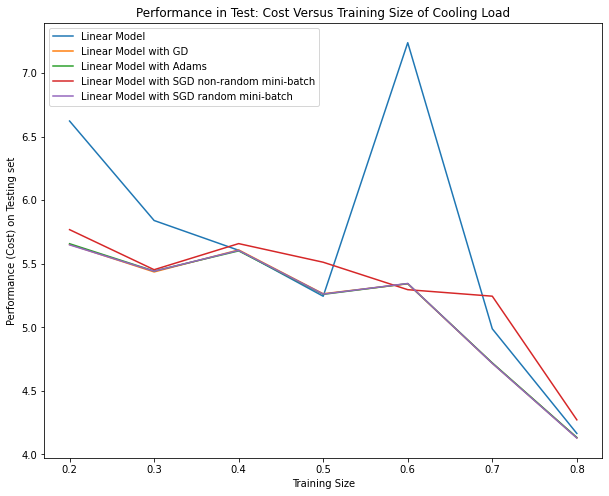

In [ ]:
#Performance of each model on testing set
xaxis = np.arange(0.2, 0.8, 0.1).tolist()
plt.figure(figsize=(10,8))
plt.plot(xaxis, lin_cte_list_y2, label = 'Linear Model')
plt.plot(xaxis, lingd_cte_list_y2, label = 'Linear Model with GD')
plt.plot(xaxis, linadam_cte_list_y2, label = 'Linear Model with Adams')
plt.plot(xaxis, linSGD1_cte_list_y2, label = 'Linear Model with SGD non-random mini-batch')
plt.plot(xaxis, linSGD2_cte_list_y2, label = 'Linear Model with SGD random mini-batch')
plt.xlabel("Training Size")
plt.ylabel("Performance (Cost) on Testing set")
plt.title("Performance in Test: Cost Versus Training Size of Cooling Load")

plt.legend()
plt.show()

### Plot2.4: Performance (Cost) of different Linear models on Training set 

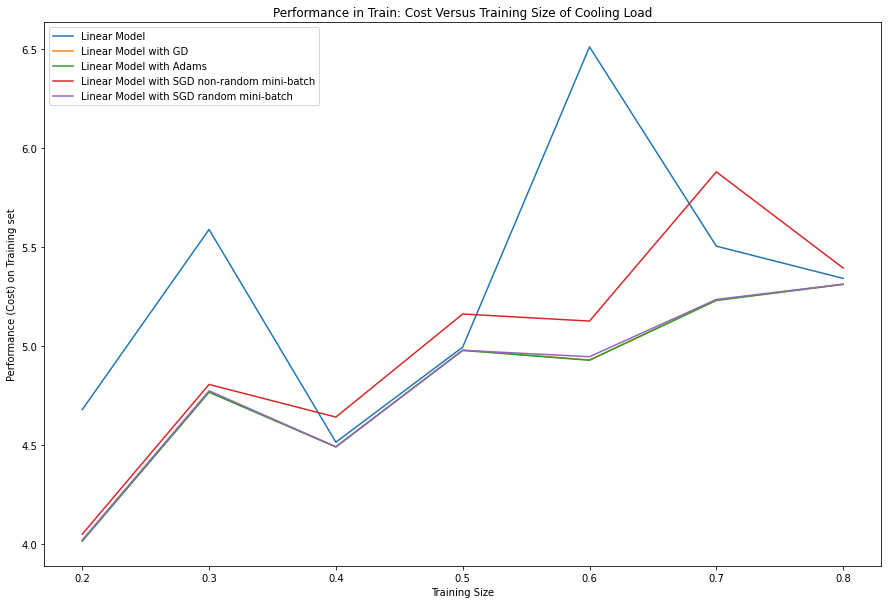

In [ ]:
#Performance of each model on training set
xaxis = np.arange(0.2, 0.8, 0.1).tolist()
plt.figure(figsize=(15,10))
plt.plot(xaxis, lin_ctr_list_y2, label = 'Linear Model')
plt.plot(xaxis, lingd_ctr_list_y2, label = 'Linear Model with GD')
plt.plot(xaxis, linadam_ctr_list_y2, label = 'Linear Model with Adams')
plt.plot(xaxis, linSGD1_ctr_list_y2, label = 'Linear Model with SGD non-random mini-batch')
plt.plot(xaxis, linSGD2_ctr_list_y2, label = 'Linear Model with SGD random mini-batch')
plt.xlabel("Training Size")
plt.ylabel("Performance (Cost) on Training set")
plt.title("Performance in Train: Cost Versus Training Size of Cooling Load")

plt.legend()
plt.show()

###Plot2.5: Subplot of plot2.1-2.4

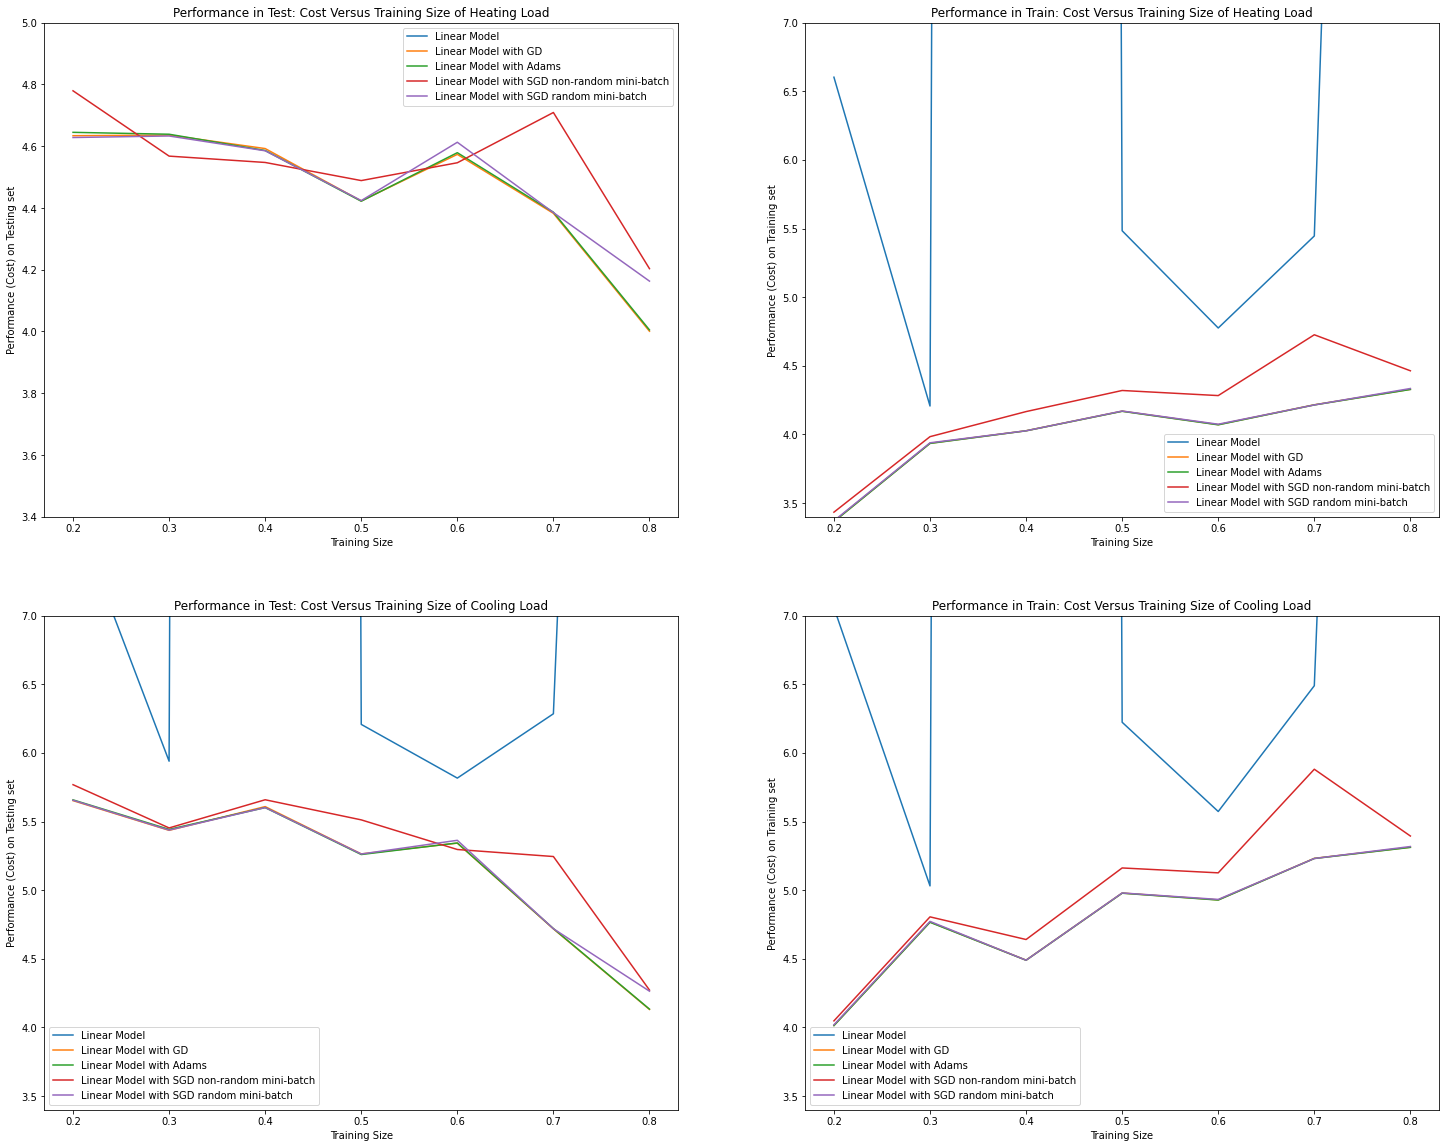

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(25, 20))
xaxis = np.arange(0.2, 0.8, 0.1).tolist()
axs[0, 0].plot(xaxis, lin_cte_list_y1, label = 'Linear Model')
axs[0, 0].plot(xaxis, lingd_cte_list_y1, label = 'Linear Model with GD')
axs[0, 0].plot(xaxis, linadam_cte_list_y1, label = 'Linear Model with Adams')
axs[0, 0].plot(xaxis, linSGD1_cte_list_y1, label = 'Linear Model with SGD non-random mini-batch')
axs[0, 0].plot(xaxis, linSGD2_cte_list_y1, label = 'Linear Model with SGD random mini-batch')
axs[0, 0].set_xlabel("Training Size")
axs[0, 0].set_ylabel("Performance (Cost) on Testing set")
axs[0, 0].set_title("Performance in Test: Cost Versus Training Size of Heating Load")
axs[0, 0].set_ylim([3.4, 5.0])
axs[0, 0].legend()


axs[0, 1].plot(xaxis, lin_ctr_list_y1, label = 'Linear Model')
axs[0, 1].plot(xaxis, lingd_ctr_list_y1, label = 'Linear Model with GD')
axs[0, 1].plot(xaxis, linadam_ctr_list_y1, label = 'Linear Model with Adams')
axs[0, 1].plot(xaxis, linSGD1_ctr_list_y1, label = 'Linear Model with SGD non-random mini-batch')
axs[0, 1].plot(xaxis, linSGD2_ctr_list_y1, label = 'Linear Model with SGD random mini-batch')
axs[0, 1].set_xlabel("Training Size")
axs[0, 1].set_ylabel("Performance (Cost) on Training set")
axs[0, 1].set_title("Performance in Train: Cost Versus Training Size of Heating Load")
axs[0, 1].set_ylim([3.4, 7.0])
axs[0, 1].legend()

axs[1, 0].plot(xaxis, lin_cte_list_y2, label = 'Linear Model')
axs[1, 0].plot(xaxis, lingd_cte_list_y2, label = 'Linear Model with GD')
axs[1, 0].plot(xaxis, linadam_cte_list_y2, label = 'Linear Model with Adams')
axs[1, 0].plot(xaxis, linSGD1_cte_list_y2, label = 'Linear Model with SGD non-random mini-batch')
axs[1, 0].plot(xaxis, linSGD2_cte_list_y2, label = 'Linear Model with SGD random mini-batch')
axs[1, 0].set_xlabel("Training Size")
axs[1, 0].set_ylabel("Performance (Cost) on Testing set")
axs[1, 0].set_title("Performance in Test: Cost Versus Training Size of Cooling Load")
axs[1, 0].set_ylim([3.4, 7.0])
axs[1, 0].legend()

axs[1, 1].plot(xaxis, lin_ctr_list_y2, label = 'Linear Model')
axs[1, 1].plot(xaxis, lingd_ctr_list_y2, label = 'Linear Model with GD')
axs[1, 1].plot(xaxis, linadam_ctr_list_y2, label = 'Linear Model with Adams')
axs[1, 1].plot(xaxis, linSGD1_ctr_list_y2, label = 'Linear Model with SGD non-random mini-batch')
axs[1, 1].plot(xaxis, linSGD2_ctr_list_y2, label = 'Linear Model with SGD random mini-batch')
axs[1, 1].set_xlabel("Training Size")
axs[1, 1].set_ylabel("Performance (Cost) on Training set")
axs[1, 1].set_title("Performance in Train: Cost Versus Training Size of Cooling Load")
axs[1, 1].set_ylim([3.4, 7.0])
axs[1, 1].legend()

plt.savefig("Linear_Task3_3.png")


### R squared: Linear model

In [ ]:
#Performance of Linear Model: test
lin_rte_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  yh = linear_model.fit(x_tr, y_tr).predict(x_te)
  r_2 = np.mean(r2_score(y_te, yh))
  lin_rte_list.append(r_2)
lin_rte_list = lin_rte_list[::-1]
lin_rte_list

[0.8675952340514166,
 0.8816564476709268,
 0.8885018988051212,
 0.8934844943536071,
 0.8527693546512584,
 0.8894075096749012,
 0.9067485658841936]

In [ ]:
#Performance of Linear Model: train
lin_rtr_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  yh = linear_model.fit(x_tr, y_tr).predict(x_tr)
  r_2 = np.mean(r2_score(y_tr, yh))
  lin_rtr_list.append(r_2)
lin_rtr_list = lin_rtr_list[::-1]
lin_rtr_list

[0.9048944172685321,
 0.8964816309479706,
 0.9154094842846618,
 0.9074135698377443,
 0.8734263646561874,
 0.8977375662960521,
 0.8994358288953936]

### R squared: Linear model with gd

In [ ]:
#Performance of Linear Model with GD: test
lingd_rte_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  optimizer = GradientDescent(learning_rate=.05, max_iters=10000, record_history=True)
  model = LinearRegression_gd()
  yh=model.fit(x_tr, y_tr, optimizer).predict(x_te)
  r_2 = np.mean(r2_score(y_te, yh))
  lingd_rte_list.append(r_2)
lingd_rte_list = lingd_rte_list[::-1]
lingd_rte_list

[0.8917102217375549,
 0.8913816469176621,
 0.8881405662664037,
 0.8935275685413007,
 0.8932116971986424,
 0.8965793042459422,
 0.907719283743543]

In [ ]:
#Performance of Linear Model with GD: train
lingd_rtr_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  optimizer = GradientDescent(learning_rate=.05, max_iters=10000, record_history=True)
  model = LinearRegression_gd()
  yh=model.fit(x_tr, y_tr, optimizer).predict(x_tr)
  r_2 = np.mean(r2_score(y_tr, yh))
  lingd_rtr_list.append(r_2)
lingd_rtr_list = lingd_rtr_list[::-1]
lingd_rtr_list

[0.9228388380948583,
 0.91388154363171,
 0.9158772618665628,
 0.9077303834694515,
 0.9068474129260864,
 0.9033347941642056,
 0.900046691935878]

### R squared: Linear model with Adams Batch

In [ ]:
#Performance of Linear Model with Adams Batch: test
linadam_rte_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  optimizer = Adams_GradientDescent(learning_rate=.05, max_iters=10000, epsilon=1e-9, record_history=True)
  model1 = Adams_LinearRegression_gd()
  yh = model1.fit(x_tr,y_tr, optimizer).predict(x_te)
  r_2 = np.mean(r2_score(yh, y_te))
  linadam_rte_list.append(r_2)
linadam_rte_list = linadam_rte_list[::-1]
linadam_rte_list

[0.8844693824275346,
 0.8882594130997169,
 0.8782370386198181,
 0.8816339003833012,
 0.8786856876723952,
 0.8872091458656344,
 0.9023771624296408]

In [ ]:
#Performance of Linear Model with Adams Batch: train
linadam_rtr_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  optimizer = Adams_GradientDescent(learning_rate=.05, max_iters=10000, epsilon=1e-9, record_history=True)
  model1 = Adams_LinearRegression_gd()
  yh = model1.fit(x_tr,y_tr, optimizer).predict(x_tr)
  r_2 = np.mean(r2_score(yh, y_tr))
  linadam_rtr_list.append(r_2)
linadam_rtr_list = linadam_rtr_list[::-1]
linadam_rtr_list

[0.9162717326272093,
 0.9055730520041025,
 0.9080065299930994,
 0.8980990149401218,
 0.8970118001759058,
 0.8926889984239604,
 0.8886421517282018]

### R squared: Linear model with SGD Version 1

In [ ]:
#Performance of Linear model with Sgd Version 1: test
linSGD1_rte_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  optimizer = SGD(max_iters=10000, record_history=True)
  model1 = LinearRegression_minisgd()
  yh = model1.fit(x_tr ,y_tr ,optimizer ,128).predict(x_te)
  r_2 = np.mean(r2_score(yh, y_te))
  linSGD1_rte_list.append(r_2)
linSGD1_rte_list = linSGD1_rte_list[::-1]
linSGD1_rte_list

9999
9999
9999
9999
9999
9999
9999


[0.882247913060903,
 0.8891422712224641,
 0.8823820334849853,
 0.8749630152154062,
 0.8814886691661364,
 0.8888878847899506,
 0.8989985162828784]

In [ ]:
#Performance of Linear model with Sgd Version 1: train
linSGD1_rtr_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  optimizer = SGD(max_iters=10000, record_history=True)
  model1 = LinearRegression_minisgd()
  yh = model1.fit(x_tr ,y_tr ,optimizer ,128).predict(x_tr)
  r_2 = np.mean(r2_score(yh, y_tr))
  linSGD1_rtr_list.append(r_2)
linSGD1_rtr_list = linSGD1_rtr_list[::-1]
linSGD1_rtr_list

9999
9999
9999
9999
9999
9999
9999


[0.9154431328229198,
 0.9053087052589397,
 0.9085933140239171,
 0.8927673740319715,
 0.89404716108178,
 0.8908125977618108,
 0.8856162933089251]

### R squared: Linear model with SGD Version 2

In [ ]:
#Performance of Linear model with Sgd Version 2: test
linSGD2_rte_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  optimizer2 = mini_SGD(max_iters=10000, record_history=True)
  model2 = LR_mini()
  yh = model2.fit(x_tr,y_tr, optimizer2,128).predict(x_te)
  r_2 = np.mean(r2_score(yh, y_te))
  linSGD2_rte_list.append(r_2)
linSGD2_rte_list = linSGD2_rte_list[::-1]
linSGD2_rte_list

[0.884317564642854,
 0.8880092208328075,
 0.8781737108730007,
 0.8812327314769836,
 0.8788468371925653,
 0.8870878327467668,
 0.9023610650866114]

In [ ]:
#Performance of Linear model with Sgd Version 2: train
linSGD2_rtr_list = []
for i in np.arange(0.2, 0.8, 0.1):
  x_tr, x_te, y_tr, y_te = sklm.train_test_split(x, y, test_size=i, random_state=39)
  optimizer2 = mini_SGD(max_iters=10000, record_history=True)
  model2 = LR_mini()
  yh = model2.fit(x_tr,y_tr, optimizer2,128).predict(x_tr)
  r_2 = np.mean(r2_score(yh, y_tr))
  linSGD2_rtr_list.append(r_2)
linSGD2_rtr_list = linSGD2_rtr_list[::-1]
linSGD2_rtr_list

[0.9162871544229281,
 0.9050768472635543,
 0.9078247697207491,
 0.8981137529303288,
 0.8968458435838859,
 0.8925869481622635,
 0.8878152021185801]

### Plot2.6: Performance (R^2) of different Linear models on Testing set 

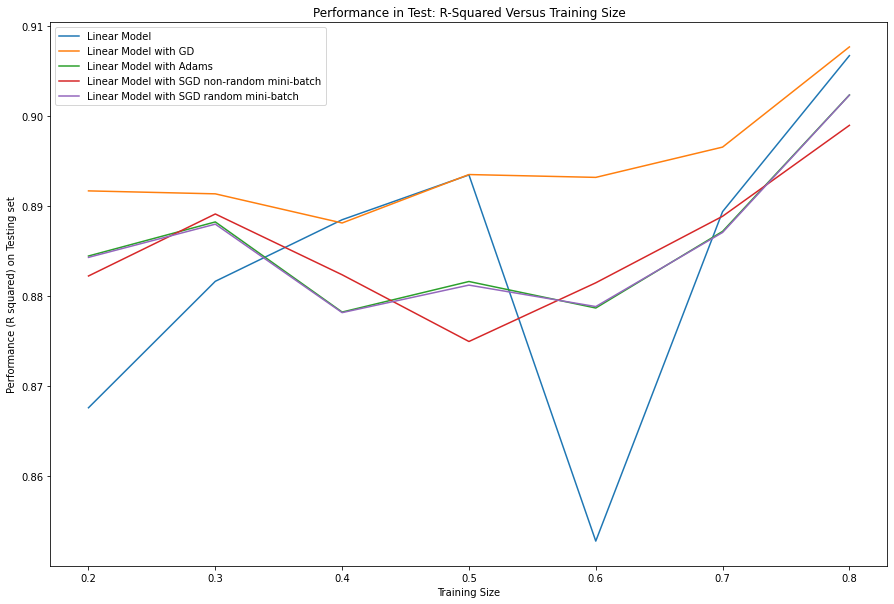

In [ ]:
#Performance of each model on testing set
xaxis = np.arange(0.2, 0.8, 0.1).tolist()
plt.figure(figsize=(15,10))
plt.plot(xaxis, lin_rte_list, label = 'Linear Model')
plt.plot(xaxis, lingd_rte_list, label = 'Linear Model with GD')
plt.plot(xaxis, linadam_rte_list, label = 'Linear Model with Adams')
plt.plot(xaxis, linSGD1_rte_list, label = 'Linear Model with SGD non-random mini-batch')
plt.plot(xaxis, linSGD2_rte_list, label = 'Linear Model with SGD random mini-batch')
plt.xlabel("Training Size")
plt.ylabel("Performance (R squared) on Testing set")
plt.title("Performance in Test: R-Squared Versus Training Size")

plt.legend()
plt.show()

### Plot2.7: Performance (R^2) of different Linear models on Training set 

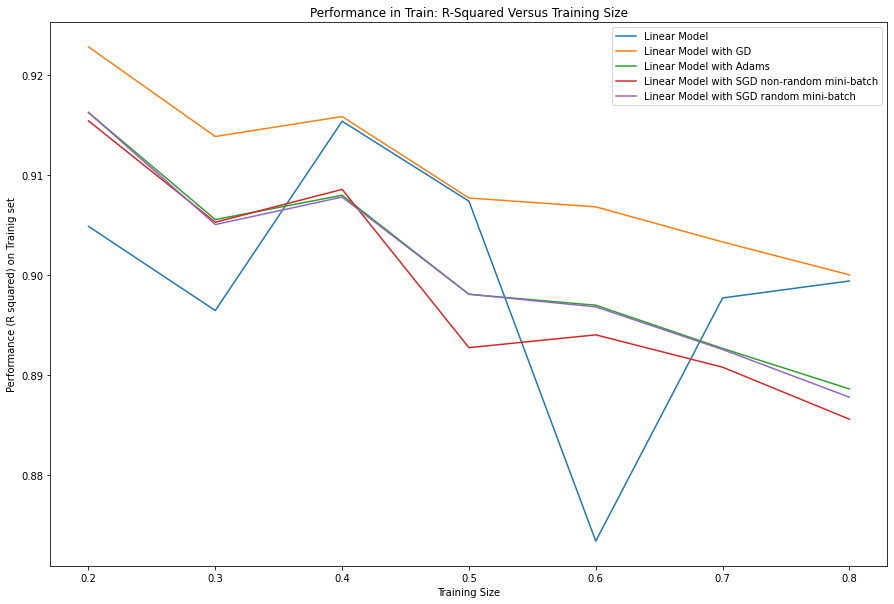

In [ ]:
#Performance of each model on testing set
xaxis = np.arange(0.2, 0.8, 0.1).tolist()
plt.figure(figsize=(15,10))
plt.plot(xaxis, lin_rtr_list, label = 'Linear Model')
plt.plot(xaxis, lingd_rtr_list, label = 'Linear Model with GD')
plt.plot(xaxis, linadam_rtr_list, label = 'Linear Model with Adams')
plt.plot(xaxis, linSGD1_rtr_list, label = 'Linear Model with SGD non-random mini-batch')
plt.plot(xaxis, linSGD2_rtr_list, label = 'Linear Model with SGD random mini-batch')
plt.xlabel("Training Size")
plt.ylabel("Performance (R squared) on Trainig set")
plt.title("Performance in Train: R-Squared Versus Training Size")

plt.legend()
plt.show()

### Plot2.8: Subplot of Plot2.6-2.7

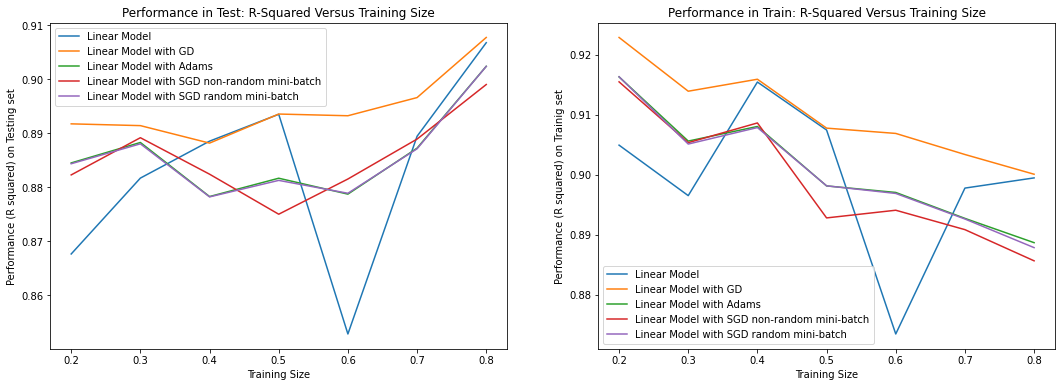

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
xaxis = np.arange(0.2, 0.8, 0.1).tolist()

axs[0].plot(xaxis, lin_rte_list, label = 'Linear Model')
axs[0].plot(xaxis, lingd_rte_list, label = 'Linear Model with GD')
axs[0].plot(xaxis, linadam_rte_list, label = 'Linear Model with Adams')
axs[0].plot(xaxis, linSGD1_rte_list, label = 'Linear Model with SGD non-random mini-batch')
axs[0].plot(xaxis, linSGD2_rte_list, label = 'Linear Model with SGD random mini-batch')
axs[0].set_xlabel("Training Size")
axs[0].set_ylabel("Performance (R squared) on Testing set")
axs[0].set_title("Performance in Test: R-Squared Versus Training Size")
axs[0].legend()

axs[1].plot(xaxis, lin_rtr_list, label = 'Linear Model')
axs[1].plot(xaxis, lingd_rtr_list, label = 'Linear Model with GD')
axs[1].plot(xaxis, linadam_rtr_list, label = 'Linear Model with Adams')
axs[1].plot(xaxis, linSGD1_rtr_list, label = 'Linear Model with SGD non-random mini-batch')
axs[1].plot(xaxis, linSGD2_rtr_list, label = 'Linear Model with SGD random mini-batch')
axs[1].set_xlabel("Training Size")
axs[1].set_ylabel("Performance (R squared) on Trainig set")
axs[1].set_title("Performance in Train: R-Squared Versus Training Size")
axs[1].legend()

plt.savefig("Linear_Task3_3_Rsq.png")


# 3.4 Changing mini-batch sizes

In [ ]:
batch_sizes = [8, 16, 64, 128]

x_te_copy = x_te.copy()
x_te_copy.insert(8,'bias',1)

cost_1 = lambda w: .5*np.mean((x_te_copy.to_numpy()@w - y_te['Heating Load'].to_numpy())**2)
cost_2 = lambda w: .5*np.mean((x_te_copy.to_numpy()@w - y_te['Cooling Load'].to_numpy())**2)

c_y1 = []
c_y2 = []
for i, bs in enumerate(batch_sizes):
    optimizer = SGD(max_iters=200, record_history=True)
    model1 = LinearRegression_minisgd()
    yh_te = model1.fit(x_tr ,y_tr ,optimizer, bs).predict(x_te)

    w_hist_y1 = []
    w_hist_y2 = []
    for k in range(200-1):
        #temp = []
        w_hist_y1.append([x[0] for x in optimizer.w_history[k]])
        #temp.append(cost_1(w_hist_y1[k]))
        c_y1.append(cost_1(w_hist_y1[k]))

    for k in range(200-1):
        w_hist_y2.append([x[1] for x in optimizer.w_history[k]])
        c_y2.append(cost_2(w_hist_y2[k]))




199
199
199
199


In [ ]:
l=[list(x) for x in np.array_split(c_y1, 4)]
#d=l[1:]

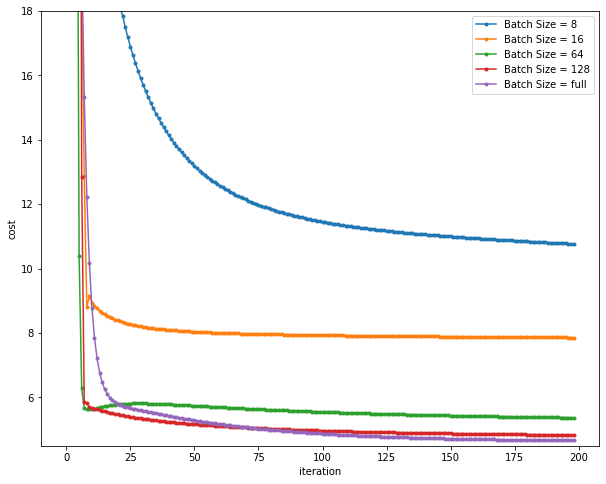

In [ ]:
########### plot 6 batch sizes ###########
fig = plt.figure(figsize=(10,8))
for i, bs in enumerate(batch_sizes):
    plt.plot(l[i], marker= '.', alpha=.998, label =(f'Batch Size = {bs}') )


######## plot full batch #############
optimizer = GradientDescent(learning_rate=.2, max_iters=200, record_history=True)
model1 = LinearRegression_gd()
gd_yh = model1.fit(x_tr,y_tr, optimizer).predict(x_te)
cost = yh_cost_fn(gd_yh, y_te)
c_y1 = []
c_y2 = []

w_hist_y1 = []
w_hist_y2 = []
for k in range(199):
        #temp = []
    w_hist_y1.append([x[0] for x in optimizer.w_history[k]])
        #temp.append(cost_1(w_hist_y1[k]))
    c_y1.append(cost_1(w_hist_y1[k]))

for k in range(199):
    w_hist_y2.append([x[1] for x in optimizer.w_history[k]])
    c_y2.append(cost_2(w_hist_y2[k]))


plt.plot(c_y1, marker= '.', alpha=.998, label =(f'Batch Size = full') )



plt.xlabel('iteration')
plt.ylabel('cost')
plt.legend()
plt.ylim([4.5,18])

plt.savefig("Linear_Task3_4.png")

# 3.5 Changing Learning Rates

In [ ]:
learning_rates = [.001, .01, 0.05, 0.1, 0.2, 0.5]
C_test = []
C_train = []
Rsq = []
for i, lr in enumerate(learning_rates):
    optimizer = GradientDescent(learning_rate=lr, max_iters=3000, record_history=True)
    model1 = LinearRegression_gd()
    yh_te = model1.fit(x_tr,y_tr, optimizer).predict(x_te)
    yh_tr = model1.fit(x_tr ,y_tr,optimizer).predict(x_tr)
    C_test.append(yh_cost_fn(yh_te, y_te))
    C_train.append(yh_cost_fn(yh_tr, y_tr))
    r_2 = np.mean(r2_score(yh_te, y_te))
    Rsq.append(r_2)


print(C_test)
print(C_train)
print(Rsq)

[array([6.87907474, 8.34619123]), array([4.72501579, 5.73272301]), array([4.62297728, 5.66039989]), array([4.62387468, 5.64979482]), array([4.63738915, 5.65382602]), array([4.64457694, 5.65769219])]
[array([5.67542968, 6.86577631]), array([3.58215193, 4.25601703]), array([3.40370492, 4.05094468]), array([3.37465254, 4.02287034]), array([3.36523498, 4.01376999]), array([3.36456577, 4.01312332])]
[0.8062236427226093, 0.8787905467396129, 0.8840072438789098, 0.884429654919135, 0.8844970456870416, 0.8844700730827624]


In [ ]:
C_test_y1 = [x[0] for x in C_test]
C_test_y2 = [x[1] for x in C_test]
print(C_test_y1)
print(C_test_y2)

[6.879074743120314, 4.725015794041487, 4.622977283674938, 4.623874675771104, 4.637389152283082, 4.644576935005881]
[8.346191227792628, 5.732723005305309, 5.660399887140274, 5.649794821922528, 5.653826015515237, 5.657692190516519]


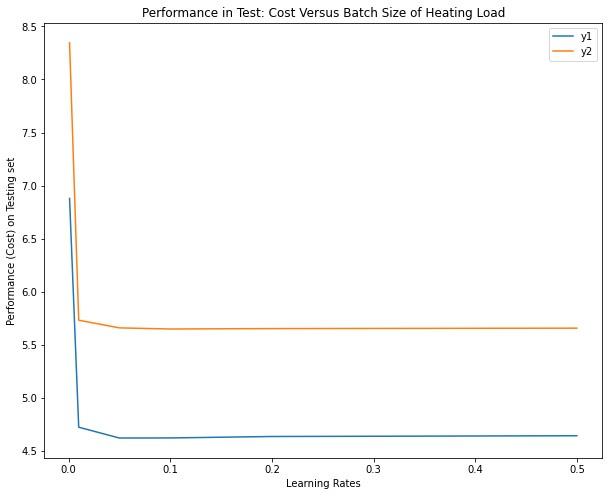

In [ ]:
#Performance of each model on testing set
f = plt.figure(figsize=(10,8))
#plt.plot(batch_sizes, C_test, label = 'Linear Model')
plt.plot(learning_rates, C_test_y1, label = 'y1')
plt.plot(learning_rates, C_test_y2, label = 'y2')
plt.xlabel("Learning Rates")
plt.ylabel("Performance (Cost) on Testing set")
plt.title("Performance in Test: Cost Versus Batch Size of Heating Load")

plt.legend()
plt.show()

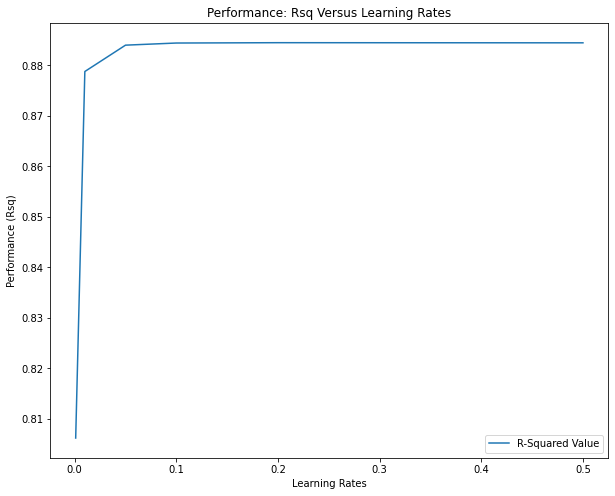

In [ ]:
#Performance of each model on testing set
f = plt.figure(figsize=(10,8))
#plt.plot(batch_sizes, C_test, label = 'Linear Model')
plt.plot(learning_rates, Rsq, label = 'R-Squared Value')
plt.xlabel("Learning Rates")
plt.ylabel("Performance (Rsq)")
plt.title("Performance: Rsq Versus Learning Rates")

plt.legend()
plt.show()

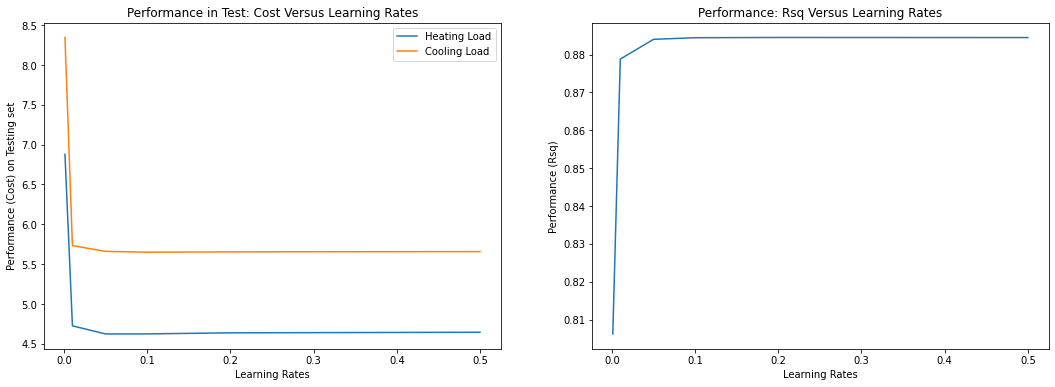

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

axs[0].plot(learning_rates, C_test_y1, label = 'Heating Load')
axs[0].plot(learning_rates, C_test_y2, label = 'Cooling Load')
axs[0].set_xlabel("Learning Rates")
axs[0].set_ylabel("Performance (Cost) on Testing set")
axs[0].set_title("Performance in Test: Cost Versus Learning Rates")
axs[0].legend()

axs[1].plot(learning_rates, Rsq, label = 'R-Squared Value')
axs[1].set_xlabel("Learning Rates")
axs[1].set_ylabel("Performance (Rsq)")
axs[1].set_title("Performance: Rsq Versus Learning Rates")

plt.savefig("Linear_Task3_5.png")


# 3.6 Analytical LM and Mini Batched LM

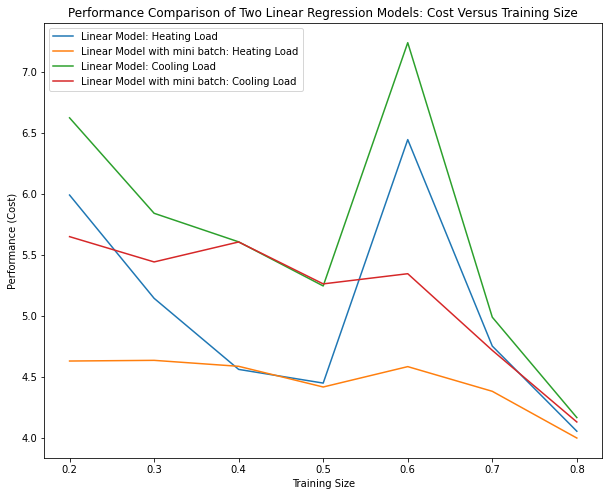

In [ ]:

xaxis = np.arange(0.2, 0.8, 0.1).tolist()
plt.figure(figsize=(10,8))
plt.plot(xaxis, lin_cte_list_y1, label = 'Linear Model: Heating Load')
plt.plot(xaxis, linSGD2_cte_list_y1, label = 'Linear Model with mini batch: Heating Load')
plt.plot(xaxis, lin_cte_list_y2, label = 'Linear Model: Cooling Load')
plt.plot(xaxis, linSGD2_cte_list_y2, label = 'Linear Model with mini batch: Cooling Load')

plt.xlabel("Training Size")
plt.ylabel("Performance (Cost)")
plt.title("Performance Comparison of Two Linear Regression Models: Cost Versus Training Size")

plt.legend()
plt.savefig('Performance Comparison of Two linear regression models.png')
plt.show()

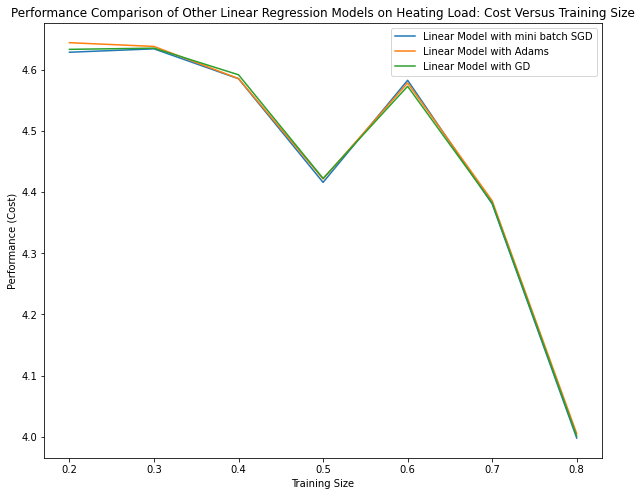

In [ ]:
#All models for Heating Load
xaxis = np.arange(0.2, 0.8, 0.1).tolist()
plt.figure(figsize=(10,8))
#plt.plot(xaxis, lin_cte_list_y1, label = 'Linear Model')
plt.plot(xaxis, linSGD2_cte_list_y1, label = 'Linear Model with mini batch SGD')
plt.plot(xaxis, linadam_cte_list_y1, label = 'Linear Model with Adams')
plt.plot(xaxis, lingd_cte_list_y1, label = 'Linear Model with GD')

plt.xlabel("Training Size")
plt.ylabel("Performance (Cost)")
plt.title("Performance Comparison of Other Linear Regression Models on Heating Load: Cost Versus Training Size")

plt.legend()
plt.savefig('Performance Comparison of linear regression models.png')
plt.show()

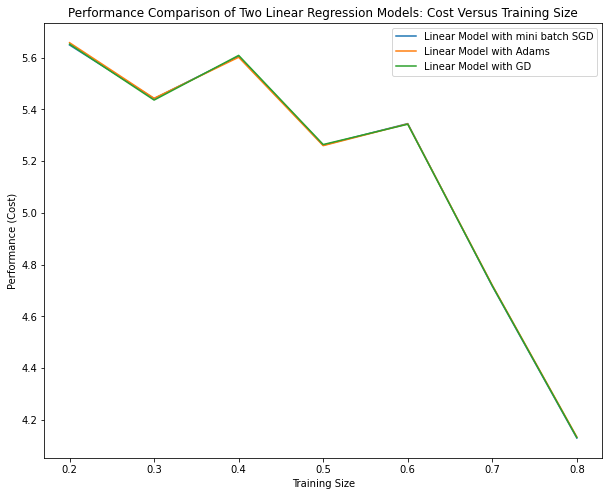

In [ ]:
#All models for Cooling Load
xaxis = np.arange(0.2, 0.8, 0.1).tolist()
plt.figure(figsize=(10,8))
plt.plot(xaxis, linSGD2_cte_list_y2, label = 'Linear Model with mini batch SGD')
plt.plot(xaxis, linadam_cte_list_y2, label = 'Linear Model with Adams')
plt.plot(xaxis, lingd_cte_list_y2, label = 'Linear Model with GD')
plt.xlabel("Training Size")
plt.ylabel("Performance (Cost)")
plt.title("Performance Comparison of Other Linear Regression Models: Cost Versus Training Size")

plt.legend()
#plt.savefig('Performance Comparison of Two linear regression models.png')
plt.show()

# Reg

In [ ]:
#l1_penalty = lambda w: np.sum(np.abs(w))
l2_penalty = lambda w: np.dot(w,w)/2
cost_plus_l2 = lambda w, l, yh, y: yh_cost_fn(yh, y) + l*l2_penalty(w)
#cost_plus_l1 = lambda w, l, x, y: cost_fn(x, y, w) + l*l1_penalty(w)

In [ ]:
def gradient_l2(self, x, y, w, lambdaa):
    yh =  x @ w 
    N, D = x.shape
    grad = .5*np.dot(yh - y, x)/N
    grad[1:] += lambdaa * self.w[1:]      
    return grad                        

In [ ]:
class GradientDescent:
    
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)               # compute the gradient with present weight        
            w = w - self.learning_rate * grad         # weight update step
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w

In [ ]:
class LinearRegression_gd_l2:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
            
    def fit(self, x, y, optimizer, lambdaa):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        N1, D1 = y.shape
        def gradient_l2(self, x, y):
            yh =  x @ w 
            N, D = x.shape
            grad = .5*np.dot(yh - y, x)/N
            grad[1:] += lambdaa * self.w[1:]      
            return grad 
        w0 = np.zeros((D, D1))  ## 9*2                             # initialize the weights to 0
        self.w = optimizer.run(gradient_l2, x, y, w0)      # run the optimizer to get the optimal weights
        return self
    
    def predict(self, x):
        if self.add_bias:
          N, D = x.shape
          x = np.column_stack([x,np.ones(N)])
        yh = x@self.w
        return yh

In [ ]:
lam = 3
optimizer = GradientDescent(learning_rate=.05, max_iters=3000)
lmod_reg = LinearRegression_gd_l2()
lmod_reg.fit(x_tr,y_tr,optimizer, lam)
w = lmod_reg.fit(x_tr,y_tr, optimizer,lam).w
print(w)
yh = lmod_reg.fit(x_tr,y_tr, optimizer,lam).predict(x_te)
yh_train = lmod_reg.fit(x_tr,y_tr, optimizer,lam).predict(x_tr)

C_train = cost_plus_l2(w,lam, yh_train, y_tr)
C_test = cost_plus_l2(w,lam,yh, y_te)

print(C_train, C_test)



ValueError: ignored

# Data2

# Task 1

Mount google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Load data2 and Data Visualization/ Statistics

In [ ]:
data2 = pd.read_csv('/content/gdrive/MyDrive/data2_shared/Qualitative_Bankruptcy/Qualitative_Bankruptcy.data.txt',
                    names=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class'])


In [ ]:
var=['Industrial Risk','Management Risk','Financial Flexibility','Credibility','Competitiveness','Operating Risk','Class']

In [ ]:
data2.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [ ]:
data2.describe()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,N,N,N,N,N,N,NB
freq,89,119,119,94,103,114,143


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Industrial Risk        250 non-null    object
 1   Management Risk        250 non-null    object
 2   Financial Flexibility  250 non-null    object
 3   Credibility            250 non-null    object
 4   Competitiveness        250 non-null    object
 5   Operating Risk         250 non-null    object
 6   Class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


Checking if there is any missing values.

In [ ]:
data2.isnull().sum()

Industrial Risk          0
Management Risk          0
Financial Flexibility    0
Credibility              0
Competitiveness          0
Operating Risk           0
Class                    0
dtype: int64

In [ ]:
data2 = pd.get_dummies(data2)
data2

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P,Class_B,Class_NB
0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1
1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1
2,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
3,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1
4,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
246,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
247,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
248,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0


In [ ]:
x_data2 = data2.drop(['Class_NB', 'Class_B'], axis=1)
#x_data2
x_copy = x_data2.copy()

x_copy.insert(18,'bias',1)

In [ ]:
y_data2 = data2['Class_NB']
y_data2

0      1
1      1
2      1
3      1
4      1
      ..
245    0
246    0
247    0
248    0
249    0
Name: Class_NB, Length: 250, dtype: uint8

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = sklm.train_test_split(x_data2,y_data2, test_size=0.2, random_state=42)
x_train_copy = X_train2.copy()
x_train_copy.insert(18,'bias',1)
x_test_copy = X_test2.copy()
x_test_copy.insert(18,'bias',1)
print(x_train_copy)


     Industrial Risk_A  Industrial Risk_N  Industrial Risk_P  \
132                  1                  0                  0   
225                  0                  0                  1   
238                  1                  0                  0   
119                  0                  0                  1   
136                  0                  0                  1   
..                 ...                ...                ...   
106                  1                  0                  0   
14                   0                  1                  0   
92                   1                  0                  0   
179                  0                  1                  0   
102                  0                  0                  1   

     Management Risk_A  Management Risk_N  Management Risk_P  \
132                  1                  0                  0   
225                  0                  1                  0   
238                  0                 

## Data Preprocessing

In [ ]:
data2.corr()

,Industrial Risk_A,Industrial Risk_N,Industrial Risk_P,Management Risk_A,Management Risk_N,Management Risk_P,Financial Flexibility_A,Financial Flexibility_N,Financial Flexibility_P,Credibility_A,Credibility_N,Credibility_P,Competitiveness_A,Competitiveness_N,Competitiveness_P,Operating Risk_A,Operating Risk_N,Operating Risk_P,Class_B,Class_NB
Industrial Risk_A,1.000000,-0.514732,-0.474919,0.279995,-0.283335,0.037841,0.037896,0.024712,-0.070651,0.000963,-0.096273,0.099348,0.079049,-0.093285,0.026930,0.214560,-0.187668,0.007427,-0.115183,0.115183
Industrial Risk_N,-0.514732,1.000000,-0.510038,-0.309552,0.395364,-0.136804,-0.079497,0.127729,-0.065550,-0.007455,0.060984,-0.056135,-0.118941,0.277201,-0.180501,-0.045638,0.174707,-0.145979,0.251705,-0.251705
Industrial Risk_P,-0.474919,-0.510038,1.000000,0.036831,-0.121561,0.102458,0.043580,-0.155900,0.138166,0.006687,0.033990,-0.042053,0.042780,-0.190943,0.158257,-0.168415,0.008953,0.142389,-0.142803,0.142803
Management Risk_A,0.279995,-0.309552,0.036831,1.000000,-0.588468,-0.354570,0.050495,-0.086790,0.048373,-0.043649,0.019508,0.023019,-0.095637,-0.098682,0.183819,0.176344,-0.116133,-0.034722,-0.118131,0.118131
Management Risk_N,-0.283335,0.395364,-0.121561,-0.588468,1.000000,-0.547337,-0.179382,0.278337,-0.136153,-0.080705,0.252258,-0.182679,-0.089444,0.324994,-0.254951,0.035661,0.156563,-0.199907,0.357219,-0.357219
Management Risk_P,0.037841,-0.136804,0.102458,-0.354570,-0.547337,1.000000,0.155182,-0.232051,0.107385,0.138515,-0.311922,0.187435,0.202434,-0.273698,0.104570,-0.223777,-0.060849,0.267127,-0.290834,0.290834
Financial Flexibility_A,0.037896,-0.079497,0.043580,0.050495,-0.179382,0.155182,1.000000,-0.618013,-0.352386,0.174769,-0.394799,0.237781,0.324168,-0.471563,0.201493,-0.059984,-0.101056,0.162391,-0.490059,0.490059
Financial Flexibility_N,0.024712,0.127729,-0.155900,-0.086790,0.278337,-0.232051,-0.618013,1.000000,-0.517960,-0.306236,0.649099,-0.372180,-0.358389,0.796896,-0.504642,0.073842,0.108321,-0.182679,0.826646,-0.826646
Financial Flexibility_P,-0.070651,-0.065550,0.138166,0.048373,-0.136153,0.107385,-0.352386,-0.517960,1.000000,0.174383,-0.343119,0.184321,0.073910,-0.435532,0.381488,-0.022634,-0.018990,0.040769,-0.450823,0.450823
Credibility_A,0.000963,-0.007455,0.006687,-0.043649,-0.080705,0.138515,0.174769,-0.306236,0.174383,1.000000,-0.517874,-0.453459,0.161098,-0.259191,0.125548,0.009169,-0.054136,0.049722,-0.279406,0.279406


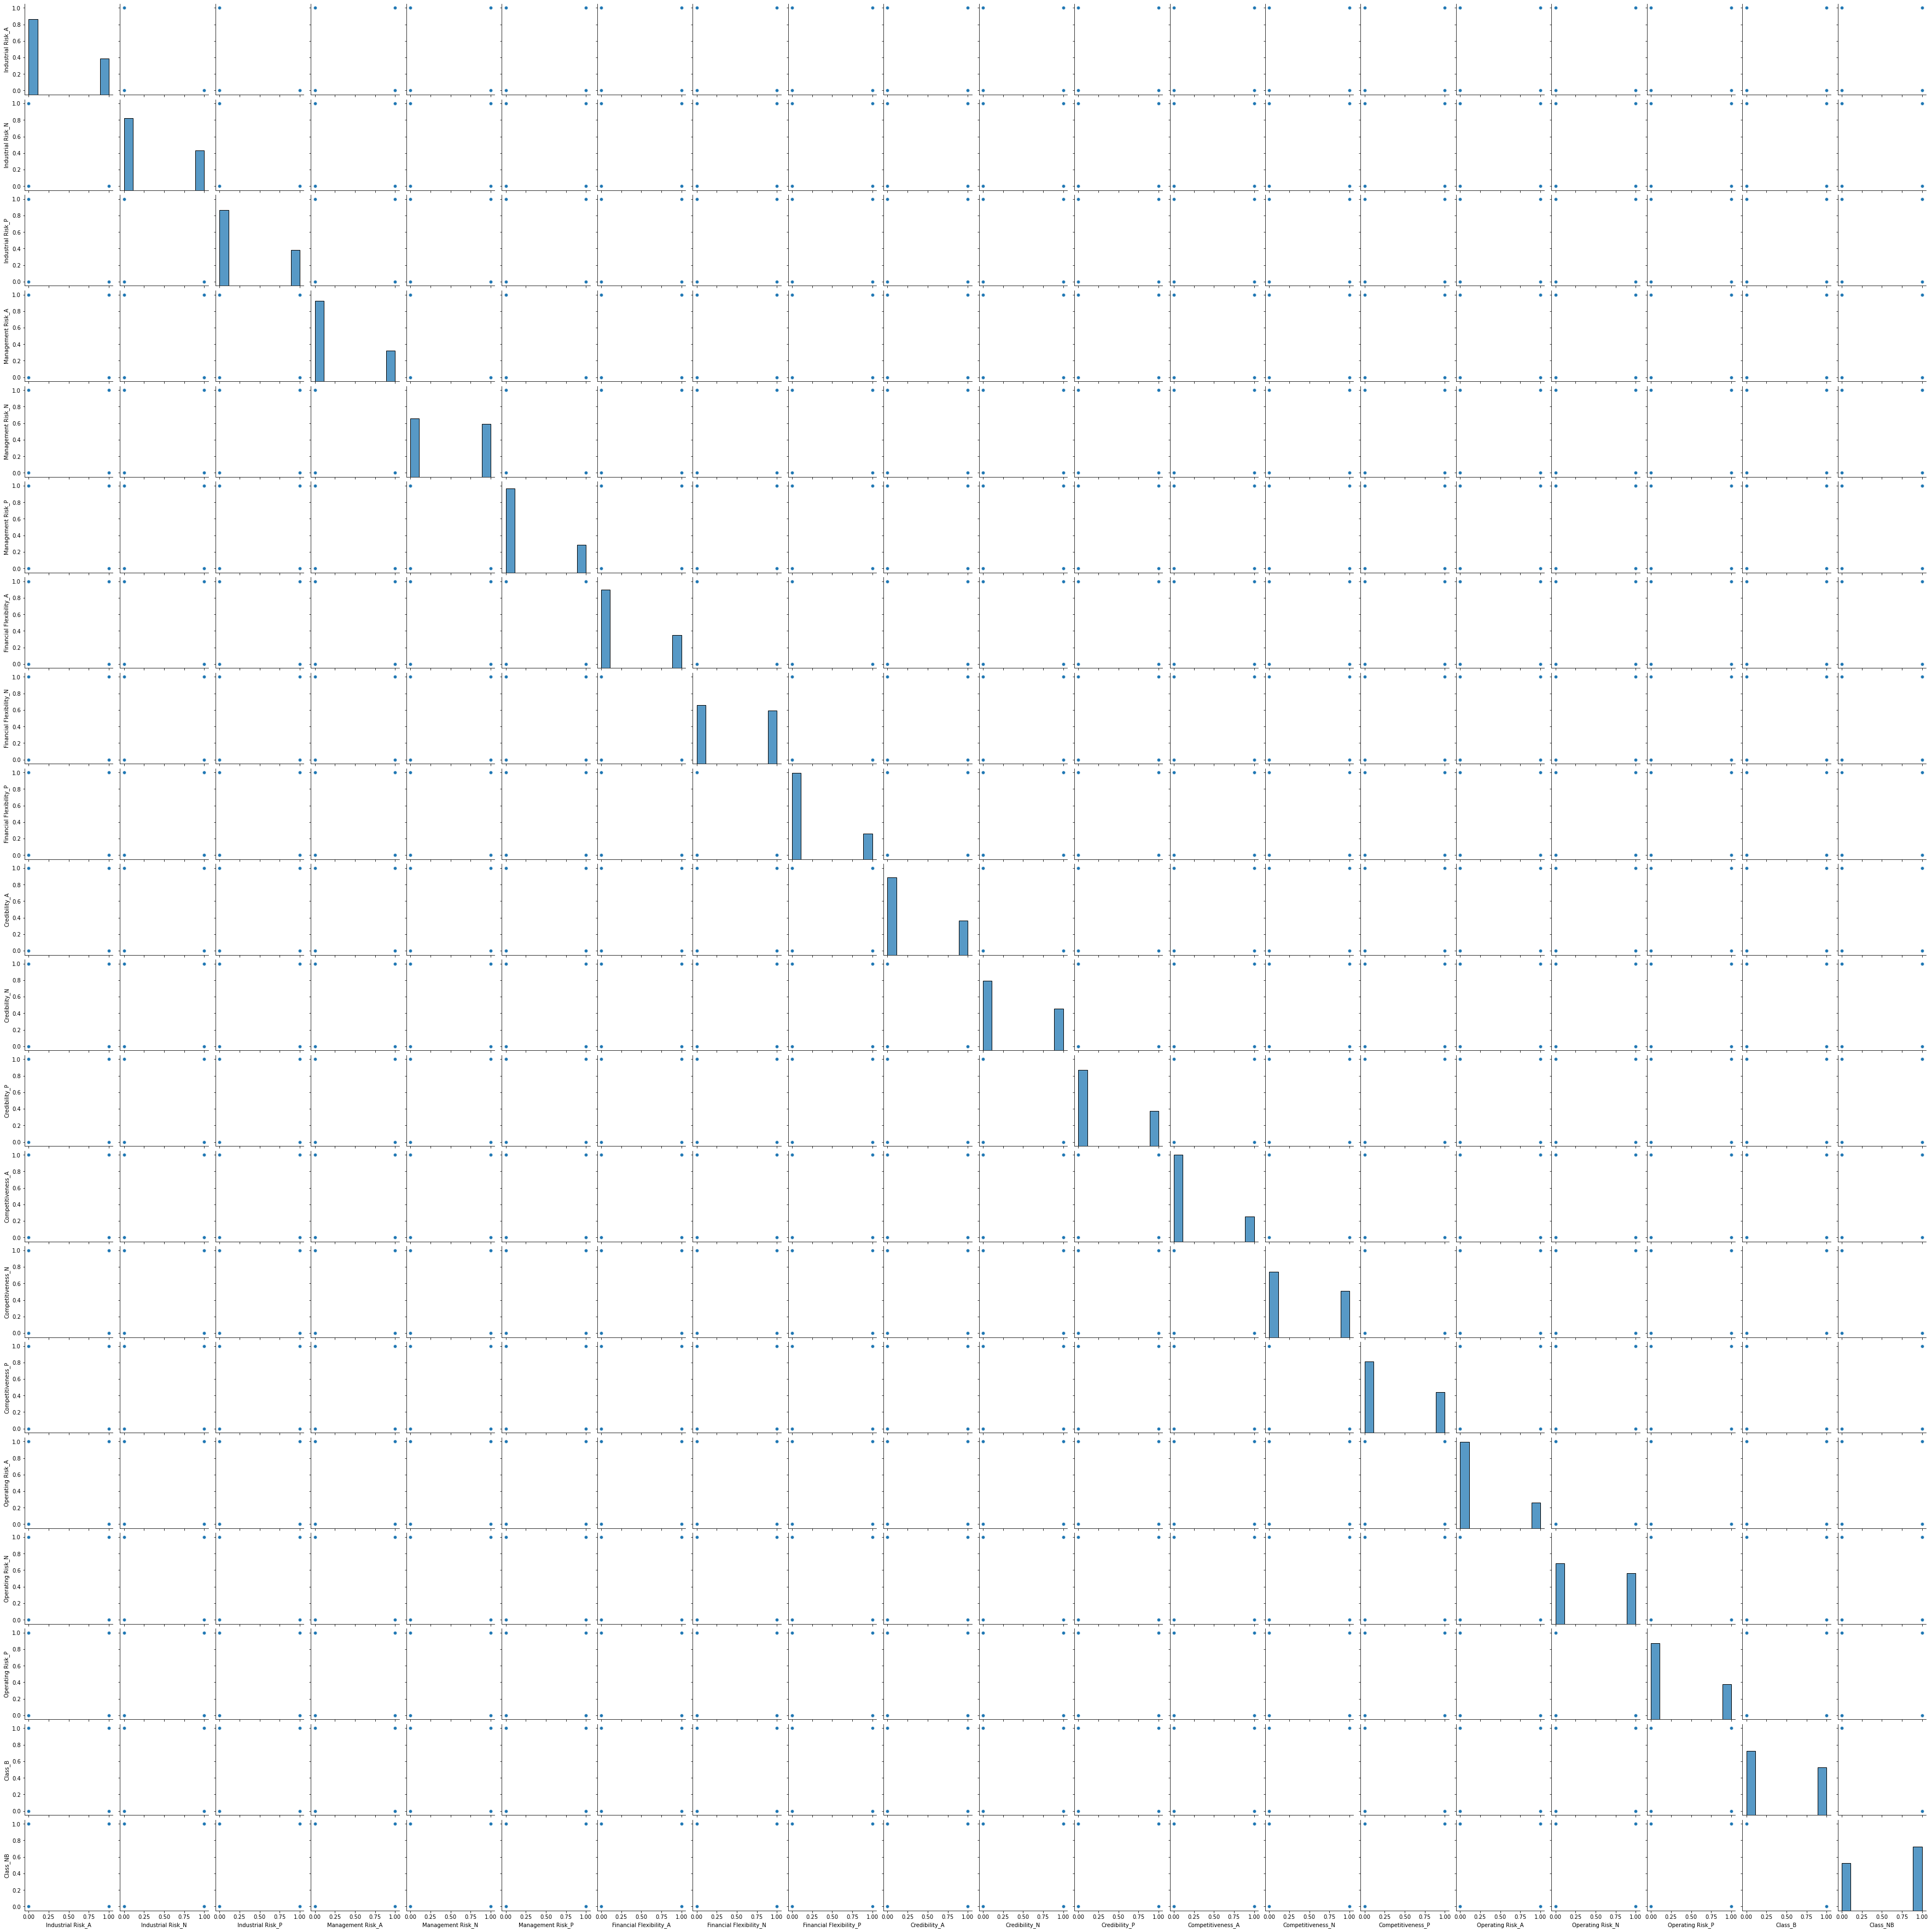

In [ ]:
sns.pairplot(data2)

Visualizing data2 (categorical)

In [ ]:

x = data2.drop(['Class'], axis = 1)
y = data2['Class']
fig, axes = plt.subplots(nrows=2, ncols=3, constrained_layout=True, figsize=(20, 13))
for i,var in enumerate(x):
  row = i//3
  col = i%3
  data2[var].plot(kind='density', color='teal',ax=axes[row,col])
  #data2[var].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6, ax=axes[row,col])
  axes[row, col].set_xlabel(var)




KeyError: ignored

In [ ]:
data2.head()

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = sklm.train_test_split(x_data2,y_data2, test_size=0.2, random_state=42)
#print(X_train2)
#print(Y_train2)

x_train_copy = X_train2.copy()
x_train_copy.insert(18,'bias',1)
x_test_copy = X_test2.copy()
x_test_copy.insert(18,'bias',1)


In [ ]:
print("X_train shape:", X_train2.shape)
print("X_test shape:", X_test2.shape)
print("Y_train shape:", Y_train2.shape)
print("X_test shape:", Y_test2.shape)

print("x_train_copy shape:", x_train_copy.shape)
print("x_test_copy shape:", x_test_copy.shape)


X_train shape: (200, 18)
X_test shape: (50, 18)
Y_train shape: (200,)
X_test shape: (50,)
x_train_copy shape: (200, 19)
x_test_copy shape: (50, 19)


#Task 2

## Logistic Regression with Fully Batched Gradient Descent

In [ ]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function

def cost_fn(x, y, w):
    N, D = x.shape                                                       
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies 
    return J

In [ ]:
def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    #print(self.w.shape)
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    #print(grad)
    return grad                         # size D

In [ ]:
class LogisticRegression:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False, record_history=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        self.record_history = record_history
        if record_history:
            self.w_history = []                 #to store the weight history for visualization
            
        
        
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape 
        w0 = np.zeros(D)  
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            #print(g)

            self.w = self.w - self.learning_rate * g 
            if self.record_history:
                self.w_history.append(self.w)
            t += 1
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

LogisticRegression.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function

In [ ]:
lmod = LogisticRegression(learning_rate=.01, max_iters=50)
lmod.fit(X_train2,Y_train2)
yh_te = lmod.fit(X_train2,Y_train2).predict(X_test2)
yh_tr = lmod.fit(X_train2,Y_train2).predict(X_train2)

In [ ]:
yh_te

array([0.55421988, 0.58255331, 0.56575704, 0.57518023, 0.54312224,
       0.46747442, 0.43029183, 0.43745293, 0.57676971, 0.56708756,
       0.44312573, 0.44002901, 0.44002901, 0.46747442, 0.52570919,
       0.45062589, 0.43745293, 0.53663665, 0.44491702, 0.56713161,
       0.44232256, 0.57518023, 0.58255331, 0.56174041, 0.44002901,
       0.55603691, 0.54689734, 0.57172876, 0.5529346 , 0.54538525,
       0.43745293, 0.56424667, 0.56424667, 0.45293   , 0.55351016,
       0.58033295, 0.53722632, 0.48723   , 0.43029183, 0.4495259 ,
       0.57172876, 0.52759203, 0.56814684, 0.47320905, 0.45785344,
       0.53949377, 0.48723   , 0.52759203, 0.44232256, 0.56253434])

In [ ]:
l=list(data2)
l=l[:-2]
l.append('bias')

In [ ]:
dd=pd.DataFrame(list(w),l)
dd['weights']=dd[0]
dd[['weights']]

,weights
Industrial Risk_A,0.030057
Industrial Risk_N,-0.018863
Industrial Risk_P,0.020754
Management Risk_A,0.019440
Management Risk_N,-0.023462
Management Risk_P,0.035969
Financial Flexibility_A,0.059656
Financial Flexibility_N,-0.078240
Financial Flexibility_P,0.050532
Credibility_A,0.043143


In [ ]:
w = lmod.fit(X_train2,Y_train2).w
w

array([ 0.03005662, -0.01886265,  0.02075364,  0.01944038, -0.02346178,
        0.03596902,  0.05965565, -0.07824015,  0.05053212,  0.04314327,
       -0.07807614,  0.06688049,  0.04711105, -0.09750685,  0.08234341,
        0.01269425, -0.01646065,  0.03571402,  0.03194762])

In [ ]:
def classify(yh):
  for i in range(len(yh)):
    if yh[i]>0.5:
      yh[i] = 1
    else:
      yh[i] = 0
  return yh

mod_yh_tr = classify(yh_tr)
mod_yh_te = classify(yh_te)

NameError: ignored

In [ ]:
c_te = cost_fn(x_test_copy, Y_test2, w.flatten())
c_te

0.6728645083906083

In [ ]:
c_tr = cost_fn(x_train_copy, Y_train2, w.flatten())
c_tr

0.6638298877120176

In [ ]:
def confusion_matrix(y, yh):
    n_classes = np.max(y) + 1
    c_matrix = np.zeros((n_classes, n_classes))
    for c1 in range(n_classes):
        for c2 in range(n_classes):
            #(y==c1)*(yh==c2) is 1 when both conditions are true or 0
            c_matrix[c1, c2] = np.sum((y==c1)*(yh==c2))
    return c_matrix

cmat_te = confusion_matrix(Y_test2, mod_yh_te)
print(cmat_te)
print(f'accuracy: {np.sum(np.diag(cmat_te))/np.sum(cmat_te)}')
acc_te = np.sum(np.diag(cmat_te))/np.sum(cmat_te)

cmat_tr = confusion_matrix(Y_train2, mod_yh_tr)
print(cmat_tr)
print(f'accuracy: {np.sum(np.diag(cmat_tr))/np.sum(cmat_tr)}')
acc_tr = np.sum(np.diag(cmat_tr))/np.sum(cmat_tr)

NameError: ignored

In [ ]:
# from sklearn.metrics import roc_auc_score
# roc_auc_score(Y_test2.to_numpy(), sgd_yh2.to_numpy())
from sklearn.metrics import roc_auc_score
roc_auc_te = roc_auc_score(Y_test2, yh_te)
roc_auc_tr = roc_auc_score(Y_train2, yh_tr)
print(roc_auc_te)
print(roc_auc_tr)

1.0
0.9941860465116279


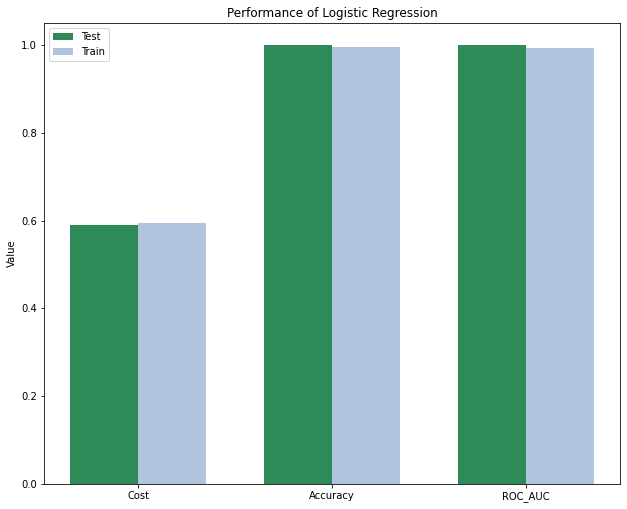

In [ ]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
xlabel = ["Cost", "Accuracy", "ROC_AUC"]
width = 0.35
Cost = [c_te, c_tr]
Acc = [acc_te, acc_tr]
AR = [roc_auc_te, roc_auc_tr]

bar_test = [c_te, acc_te, roc_auc_te]
bar_train = [c_tr, acc_tr, roc_auc_tr]

rects1 = ax.bar(np.arange(len(xlabel)), bar_test, width=0.35, color='seagreen')
rects2 = ax.bar(np.arange(len(xlabel))+width, bar_train, width = 0.35, color='lightsteelblue')
ax.set_ylabel('Value')
ind = np.arange(len(xlabel))
ax.set_xticks(ind + width / 2)
ax.set_title('Performance of Logistic Regression')
ax.set_xticklabels(('Cost', 'Accuracy', 'ROC_AUC'))
ax.legend((rects1[0], rects2[0]), ('Test', 'Train'))
plt.savefig("Data2_Task3_1.png")

## Logistic Regression with Mini-Batch Stochastic Gradient Descent Version 1




In [ ]:
class SGD:
    
    def __init__(self, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)               # compute the gradient with present weight
            #self.w_history.append(w)
            # print(w.shape, grad.shape)
            # print(grad)
            w = w - pow(t, -0.51) * grad         # weight update step
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w

In [ ]:
class LogisticRegression_minisgd:
    
    def __init__(self, add_bias=True, verbose=False):
        self.add_bias = add_bias
        self.verbose = verbose
        pass
        
    def fit(self, x, y, optimizer, size):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        #print(len(y.shape))
        if len(y.shape) == 1:
          D1 = 1
        else:
          N1, D1 = y.shape
        def gradient(x, y, w):    # define the gradient function
            x_df = pd.DataFrame(x)
            N3,D3 = x_df.shape
            y = y.reset_index()
            y.pop(y.columns[0])
            #if the batch is always the same
            # xy = pd.concat([x_df, y], axis=1)
            # xymini = xy.sample(n = size, random_state = size)
            # xmini = xymini[xymini.columns[:D3]]
            # ymini = xymini[xymini.columns[D3:]]
            #if the batch is random every time
            xmini = x_df.sample(n=size, random_state=size)
            ymini = y.sample(n=size, random_state=size)
            #start using the mini batch
            yhmini = xmini@w
            N2, D2 = xmini.shape
            yhmini = yhmini.to_numpy()
            ymini = ymini.to_numpy()
            grad = np.dot(xmini.T, yhmini-ymini)/N2
            return grad
        w0 = np.zeros((D, D1))                                # initialize the weights to 0
        self.w = optimizer.run(gradient, x, y, w0)      # run the optimizer to get the optimal weights
        return self
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh


In [ ]:
optimizer = SGD(max_iters=7000, record_history=True)
model1 = LogisticRegression_minisgd()
yh_te = model1.fit(X_train2 ,Y_train2 ,optimizer, 128).predict(X_test2)
yh_tr = model1.fit(X_train2,Y_train2 ,optimizer,128).predict(X_train2)


In [ ]:
w = model1.fit(X_train2 ,Y_train2 ,optimizer ,128).w
w = w.flatten()
w

array([ 0.09546925,  0.06518419,  0.05611449,  0.08171043,  0.06261955,
        0.07243795,  0.09613716,  0.03833279,  0.08229798,  0.09130672,
        0.01980701,  0.10565419,  0.34094723, -0.51344811,  0.38926881,
        0.05154149,  0.08318966,  0.08203677,  0.21676793])

In [ ]:
mod_yh_tr = classify(yh_tr).flatten()
mod_yh_te = classify(yh_te).flatten()
mod_yh_te

array([1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

In [ ]:
cost_fn(x_test_copy, Y_test2, w)

0.47288507925397155

In [ ]:
cost_fn(x_train_copy, Y_train2, w)

0.4890425906773636

In [ ]:
cmat_te = confusion_matrix(Y_test2, mod_yh_te)
print(cmat_te)
print(f'accuracy: {np.sum(np.diag(cmat_te))/np.sum(cmat_te)}')

cmat_tr = confusion_matrix(Y_train2, mod_yh_tr)
print(cmat_tr)
print(f'accuracy: {np.sum(np.diag(cmat_tr))/np.sum(cmat_tr)}')

[[13.  8.]
 [ 0. 29.]]
accuracy: 0.84
[[ 47.  39.]
 [  0. 114.]]
accuracy: 0.805


In [ ]:
roc_auc_te = roc_auc_score(Y_test2, yh_te)
roc_auc_tr = roc_auc_score(Y_train2, yh_tr)
print(roc_auc_te)
print(roc_auc_tr)

0.8095238095238095
0.7732558139534884


## Logistic Regression with Mini-Batch Stochastic Gradient Descent Version 2

In [ ]:
class mini_SGD:
    
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        if record_history:
            self.w_history = []                 #to store the weight history for visualization

            
    def run(self, gradient_fn, x, y, w, size):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            mini_batches = create_mini_batches2(x, y, size)
            for mini_batch in mini_batches:
                X_mini, y_mini = mini_batch
                #print(X_mini.shape)
                #print(y_mini[0].shape)

                grad = gradient_fn(X_mini, y_mini[0], w)               # compute the gradient with present weight
                
                #self.w_history.append(w)
                w = w - pow(t, -0.51) * grad         # weight update step
                
                if self.record_history:
                    self.w_history.append(w)

            t += 1

            


        return w

In [ ]:
class Logistic_mini:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        
    def fit(self, x, y, optimizer, size):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        #N1, D1 = y.shape

        def gradient(x, y, w):
            N,D = x.shape
            #print(x.shape)
            #print(w.shape) ## (7,7)?????????????

            yh = logistic(np.dot(x, w))    # predictions  size N
            #print((yh-y[0]).shape)
            grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
            
            return grad 

        w0 = np.zeros(D)  
        #print(x.shape)
        #print(w0.shape)

        self.w = optimizer.run(gradient, x, y, w0, size)      # run the optimizer to get the optimal weights        
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh


In [ ]:
def create_mini_batches2(X, y, batch_size):
    mini_batches = []
    data = np.hstack((X, y.to_frame()))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
 
    for i in range(n_minibatches):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1:]
        #print(Y_mini)
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1:]

        mini_batches.append((X_mini, Y_mini))
    return mini_batches


print(create_mini_batches2(X_train2, Y_train2, 1))

In [ ]:
optimizer2 = mini_SGD(max_iters=5000, record_history=True)
model2 = Logistic_mini()
yh_te = model2.fit(X_train2 ,Y_train2 ,optimizer2,64).predict(X_test2)
yh_tr = model2.fit(X_train2,Y_train2 ,optimizer2,64).predict(X_train2)


In [ ]:
w = model2.fit(X_train2 ,Y_train2 ,optimizer2 ,64).w
w = w.flatten()
w

array([0.04675981, 0.03457384, 0.04101733, 0.03480634, 0.04592118,
       0.04162346, 0.03489131, 0.0471598 , 0.04029988, 0.04051461,
       0.04084562, 0.04099076, 0.04483986, 0.0284816 , 0.04902953,
       0.03890368, 0.04522828, 0.03821902, 0.12235098])

In [ ]:
mod_yh_tr = classify(yh_tr).flatten()
mod_yh_te = classify(yh_te).flatten()
mod_yh_te

array([1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.])

In [ ]:
cost_fn(x_test_copy, Y_test2, w)

0.6789863274380553

In [ ]:
cost_fn(x_train_copy, Y_train2, w)

0.6820624846285105

In [ ]:
cmat_te = confusion_matrix(Y_test2, mod_yh_te)
print(cmat_te)
print(f'accuracy: {np.sum(np.diag(cmat_te))/np.sum(cmat_te)}')

cmat_tr = confusion_matrix(Y_train2, mod_yh_tr)
print(cmat_tr)
print(f'accuracy: {np.sum(np.diag(cmat_tr))/np.sum(cmat_tr)}')

[[21.  0.]
 [ 0. 29.]]
accuracy: 1.0
[[  0.  86.]
 [  0. 114.]]
accuracy: 0.57


In [ ]:
roc_auc_te = roc_auc_score(Y_test2, yh_te)
roc_auc_tr = roc_auc_score(Y_train2, yh_tr)
print(roc_auc_te)
print(roc_auc_tr)

1.0
0.5


# Task 3 Stuff

## 3.1 Performance of Fully Batched Logistic Regression Model

In [ ]:
cost_fn(x_test_copy, Y_test2, w)

0.6801313437123712

In [ ]:
lmod = LogisticRegression()
lmod.fit(X_train2,Y_train2)
yh = lmod.fit(X_train2,Y_train2).predict(X_test2)
yh = classify(yh)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test2, yh)

0.5804597701149425

In [ ]:
cmat = confusion_matrix(Y_test2, yh)
print(cmat)
print(f'accuracy: {np.sum(np.diag(cmat))/np.sum(cmat)}')

[[ 7. 14.]
 [ 5. 24.]]
accuracy: 0.62


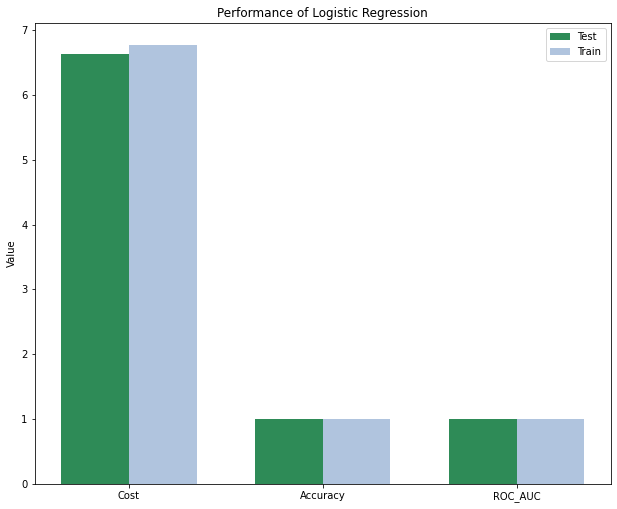

In [ ]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
xlabel = ["Cost", "Accuracy", "ROC_AUC"]
width = 0.35
Cost = [c_te, c_tr]
Acc = [acc_te, acc_tr]
AR = [roc_auc_te, roc_auc_tr]

bar_test = [c_te, acc_te, roc_auc_te]
bar_train = [c_tr, acc_tr, roc_auc_tr]

rects1 = ax.bar(np.arange(len(xlabel)), bar_test, width=0.35, color='seagreen')
rects2 = ax.bar(np.arange(len(xlabel))+width, bar_train, width = 0.35, color='lightsteelblue')
ax.set_ylabel('Value')
ind = np.arange(len(xlabel))
ax.set_xticks(ind + width / 2)
ax.set_title('Performance of Logistic Regression')
ax.set_xticklabels(('Cost', 'Accuracy', 'ROC_AUC'))
ax.legend((rects1[0], rects2[0]), ('Test', 'Train'))
plt.savefig("Data2_Task3_1.png")

## 3.2 Weights of Each Feature in the Trained Model

In [ ]:
w = lmod.fit(X_train2,Y_train2).w
w

array([-0.17240008,  0.3220833 , -0.18648981,  0.28090774,  0.56309571,
        0.33684806, -0.94135416])

## 3.3 Sample growing subsets of the training data (20%,30%,...80%)

In [ ]:
testing_size = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
C_test = []
C_train = []
A_test = []
A_train = []
R_test = []
R_train = []
for i, ts in enumerate(testing_size):
    X_train2_tmp, X_test2_tmp, Y_train2_tmp, Y_test2_tmp = sklm.train_test_split(x_data2,y_data2, test_size=ts, random_state=40)
    model = LogisticRegression(learning_rate=.01, max_iters=200)
    w = model.fit(X_train2_tmp,Y_train2_tmp).w

    yh_te = model.fit(X_train2_tmp,Y_train2_tmp).predict(X_test2_tmp)
    yh_tr = model.fit(X_train2_tmp,Y_train2_tmp).predict(X_train2_tmp)

    mod_yh = classify(yh_te)
    mod_yh_train = classify(yh_tr)

    roc_auc_te = roc_auc_score(Y_test2_tmp, yh_te)
    roc_auc_tr = roc_auc_score(Y_train2_tmp, yh_tr) 
    R_test.append(roc_auc_te)
    R_train.append(roc_auc_tr)


    X_train2_tmp.insert(18, 'bias', 1)
    X_test2_tmp.insert(18, 'bias', 1)
    C_test.append(cost_fn(X_test2_tmp, Y_test2_tmp, w))
    C_train.append(cost_fn(X_train2_tmp, Y_train2_tmp, w))


    cmat = confusion_matrix(Y_test2_tmp, mod_yh)
    print(cmat)
    print(f'accuracy: {np.sum(np.diag(cmat))/np.sum(cmat)}')
    A_test.append(np.sum(np.diag(cmat))/np.sum(cmat))

    cmat = confusion_matrix(Y_train2_tmp, mod_yh_train)
    A_train.append(np.sum(np.diag(cmat))/np.sum(cmat))

print(C_test)
print(C_train)
print(A_test)
print(A_train)
print(R_test)
print(R_train)

[[ 80.   1.]
 [  3. 116.]]
accuracy: 0.98
[[ 73.   1.]
 [  1. 100.]]
accuracy: 0.9885714285714285
[[62.  1.]
 [ 1. 86.]]
accuracy: 0.9866666666666667
[[54.  0.]
 [ 1. 70.]]
accuracy: 0.992
[[47.  0.]
 [ 0. 53.]]
accuracy: 1.0
[[36.  0.]
 [ 0. 39.]]
accuracy: 1.0
[[24.  0.]
 [ 0. 26.]]
accuracy: 1.0
[0.4164141278044245, 0.40960657046821, 0.41298367626486965, 0.4069906359746974, 0.4063064546359687, 0.4010388577354409, 0.40040865013102417]
[0.3637666576283493, 0.38166223983754044, 0.37958113997349147, 0.39382528101222974, 0.4044117454866721, 0.4071140630475528, 0.40409337509462817]
[0.98, 0.9885714285714285, 0.9866666666666667, 0.992, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 0.992, 0.9933333333333333, 0.9942857142857143, 0.99]
[0.9812221184770203, 0.9882927481937382, 0.9863163656267105, 0.9929577464788732, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 0.9905660377358491, 0.9916666666666666, 0.9929577464788732, 0.9897023993409535]


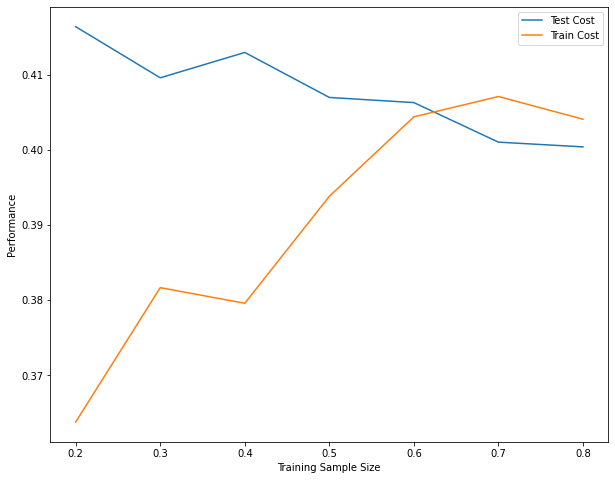

In [ ]:
plt.figure(figsize=(10,8))
training_size = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

plt.plot(training_size,C_test, label='Test Cost')
plt.plot(training_size,C_train, label='Train Cost')
#plt.plot(training_size,A_test, label='Test Accuracy')
#plt.plot(training_size,A_train, label='Train Accuracy')
#plt.plot(training_size,R_test, label='Test Accuracy')
#plt.plot(training_size,R_train, label='Train Accuracy')


plt.xlabel("Training Sample Size")
plt.ylabel("Performance")
plt.legend()
plt.show()


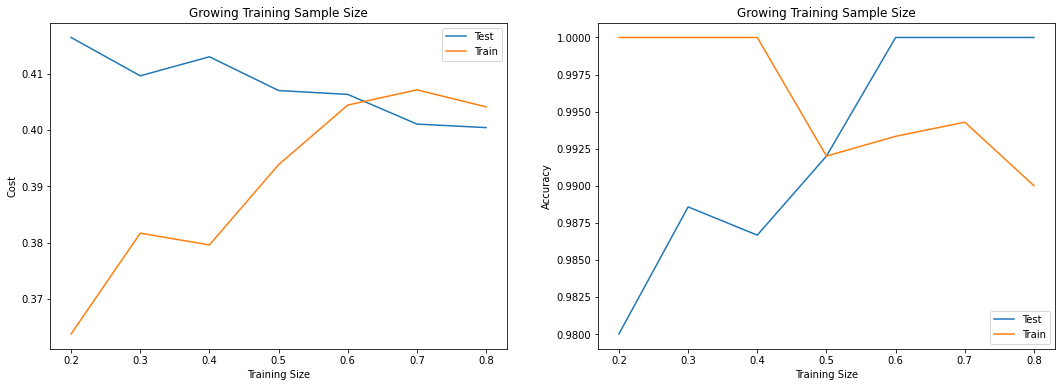

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
xaxis = np.arange(0.2, 0.8, 0.1).tolist()

axs[0].plot(xaxis, C_test, label = 'Test')
axs[0].plot(xaxis, C_train, label = 'Train')
axs[0].set_xlabel("Training Size")
axs[0].set_ylabel("Cost")
axs[0].set_title("Growing Training Sample Size")
axs[0].legend()

axs[1].plot(xaxis, A_test, label = 'Test')
axs[1].plot(xaxis, A_train, label = 'Train')
axs[1].set_xlabel("Training Size")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("Growing Training Sample Size")
axs[1].legend()

plt.savefig("Log_Task3_3.png")

## 3.4 Changing mini-batch sizes

In [ ]:
batch_sizes = [8, 16, 32, 64, 128]
C_test = []
C_train = []
A_test = []
A_train = []
for i, bs in enumerate(batch_sizes):
    optimizer2 = mini_SGD(learning_rate=.006, max_iters=3000, record_history=True)
    model2 = Logistic_mini()
    gd_yh = model2.fit(X_train2 ,Y_train2, optimizer2, size = bs).predict(X_test2)
    #model.fit(x,y)
    w = model2.fit(X_train2 ,Y_train2, optimizer2, size = bs).w
    mod_yh = classify(gd_yh)

    yh_train = model2.fit(X_train2 ,Y_train2, optimizer2, size = bs).predict(X_train2)
    mod_yh_train = classify(yh_train)

    C_test.append(cost_fn(x_test_copy, Y_test2, w))
    C_train.append(cost_fn(x_train_copy, Y_train2, w))


    cmat = confusion_matrix(Y_test2, mod_yh)
    print(cmat)
    print(f'accuracy: {np.sum(np.diag(cmat))/np.sum(cmat)}')
    A_test.append(np.sum(np.diag(cmat))/np.sum(cmat))

    cmat = confusion_matrix(Y_train2, mod_yh_train)
    A_train.append(np.sum(np.diag(cmat))/np.sum(cmat))

print(C_test)
print(C_train)

print(A_test)
print(A_train)



[[ 0. 21.]
 [ 7. 22.]]
accuracy: 0.44
[[11. 10.]
 [18. 11.]]
accuracy: 0.44
[[ 0. 21.]
 [ 0. 29.]]
accuracy: 0.58
[[ 0. 21.]
 [ 0. 29.]]
accuracy: 0.58
[[ 0. 21.]
 [ 0. 29.]]
accuracy: 0.58
[0.6864623947686348, 0.666728114764911, 0.7079396454620739, 0.7124897651350488, 0.7138223893166337]
[0.6846875914415026, 0.6811187096925221, 0.6977690320014909, 0.7013690840333388, 0.7007279730988497]
[0.44, 0.44, 0.58, 0.58, 0.58]
[0.57, 0.57, 0.57, 0.57, 0.57]


In [ ]:
batch_sizes = [8, 16, 32, 64, 128]
c = []
a = []
for i, bs in enumerate(batch_sizes):
    optimizer2 = SGD(max_iters=3000, record_history=True)
    model2 = LogisticRegression_minisgd()
    gd_yh = model2.fit(X_train2 ,Y_train2, optimizer2, size = bs).predict(X_test2)
    #model.fit(x,y)
    w = model2.fit(X_train2 ,Y_train2, optimizer2, size = bs).w
    mod_yh = classify(gd_yh)
    c.append(cost_fn(x_copy, y_data2, w.flatten()))

    cmat = confusion_matrix(Y_test2, mod_yh.flatten())
    print(cmat)
    print(f'accuracy: {np.sum(np.diag(cmat))/np.sum(cmat)}')
    a.append(np.sum(np.diag(cmat))/np.sum(cmat))

print(c)
print(a)

[[12.  9.]
 [ 6. 23.]]
accuracy: 0.7
[[ 3. 18.]
 [ 4. 25.]]
accuracy: 0.56
[[ 0. 21.]
 [ 0. 29.]]
accuracy: 0.58
[[ 0. 21.]
 [ 0. 29.]]
accuracy: 0.58
[[ 0. 21.]
 [ 0. 29.]]
accuracy: 0.58
[0.6855187835167948, 0.651848392647304, 0.6769476821291076, 0.6769520874363367, 0.6729764900328727]
[0.7, 0.56, 0.58, 0.58, 0.58]


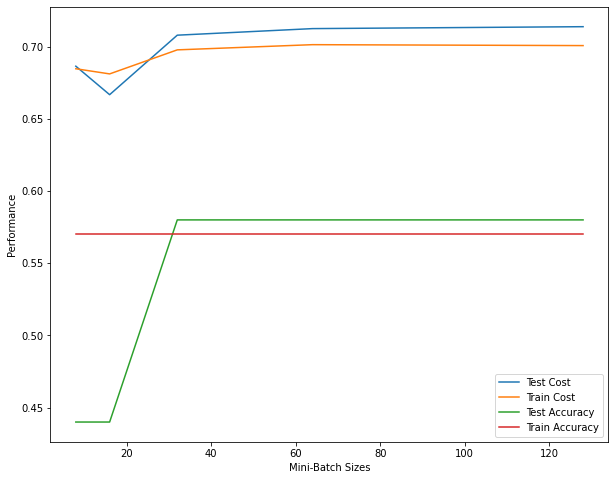

In [ ]:
plt.figure(figsize=(10,8))


plt.plot(batch_sizes,C_test, label='Test Cost')
plt.plot(batch_sizes,C_train, label='Train Cost')
plt.plot(batch_sizes,A_test, label='Test Accuracy')
plt.plot(batch_sizes,A_train, label='Train Accuracy')

plt.xlabel("Mini-Batch Sizes")
plt.ylabel("Performance")
plt.legend()
plt.show()





In [ ]:
batch_sizes = [8, 16, 32, 64, 128]

#cost_1 = lambda w: .5*np.mean((X_test2@w - Y_test2.to_numpy())**2)


c_y = []
for i, bs in enumerate(batch_sizes):
    optimizer = SGD(max_iters=200, record_history=True)
    model1 = LogisticRegression_minisgd()
    yh_te = model1.fit(X_train2 ,Y_train2 ,optimizer, bs).predict(X_test2)

    w_hist = []
    for k in range(200-1):
        w_hist.append(optimizer.w_history[k].flatten())
        c_y.append(cost_fn(x_test_copy, Y_test2, w_hist[k]))






In [ ]:
l=[list(x) for x in np.array_split(c_y, 5)]
len(l[0])

199

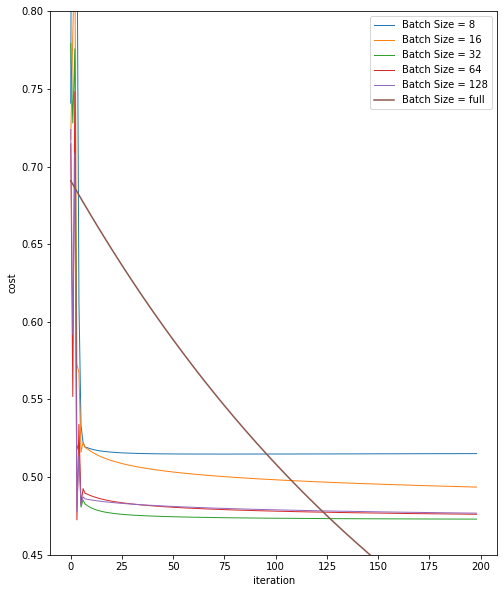

In [ ]:
########### plot 6 batch sizes ###########
fig = plt.figure(figsize=(8,10))
for i, bs in enumerate(batch_sizes):
    plt.plot(l[i], alpha=.998,linewidth=1, label =(f'Batch Size = {bs}') )


######## plot full batch #############
lmod = LogisticRegression(learning_rate=.01, max_iters=200, record_history=True)
yh_te = lmod.fit(X_train2,Y_train2).predict(X_test2)

c_y = []
w_hist = []
for k in range(200-1):
    w_hist.append(lmod.w_history[k].flatten())
    c_y.append(cost_fn(x_test_copy, Y_test2, w_hist[k]))

plt.plot(c_y, alpha=.998, label =(f'Batch Size = full') )



plt.xlabel('iteration')
plt.ylabel('cost')
plt.legend()
plt.ylim([0.45,0.8])
plt.savefig("Log_Task3_4.png")

In [ ]:
c_y

##3.5 Changing learning rates

In [ ]:
learning_rates = [.001, .01, 0.05, 0.1, 0.2]
C_test = []
C_train = []
A_test = []
A_train = []
for i, lr in enumerate(learning_rates):
    lmod = LogisticRegression(learning_rate=lr, max_iters=50)
    lmod.fit(X_train2,Y_train2)
    yh_te = lmod.fit(X_train2,Y_train2).predict(X_test2)
    yh_tr = lmod.fit(X_train2,Y_train2).predict(X_train2)
    w = lmod.fit(X_train2,Y_train2).w
    mod_yh_te = classify(yh_te)
    mod_yh_tr = classify(yh_tr)

    C_test.append(cost_fn(x_test_copy, Y_test2, w))
    C_train.append(cost_fn(x_train_copy, Y_train2, w))

    cmat_te = confusion_matrix(Y_test2, mod_yh_te)
    #print(cmat_tr)
    #print(f'accuracy: {np.sum(np.diag(cmat_tr))/np.sum(cmat_tr)}')
    A_test.append(np.sum(np.diag(cmat_te))/np.sum(cmat_te))

    cmat_tr = confusion_matrix(Y_train2, mod_yh_tr)
    A_train.append(np.sum(np.diag(cmat_tr))/np.sum(cmat_tr))

print(C_test)
print(C_train)
print(A_test)
print(A_train)

[0.6816570309609784, 0.5902109221308826, 0.3542572621332838, 0.23096699182216937, 0.13666214585066094]
[0.6820438494133625, 0.5935161881115698, 0.363279249943283, 0.2414778167210584, 0.1474057971814709]
[1.0, 1.0, 1.0, 1.0, 1.0]
[0.995, 0.995, 0.99, 0.99, 0.99]


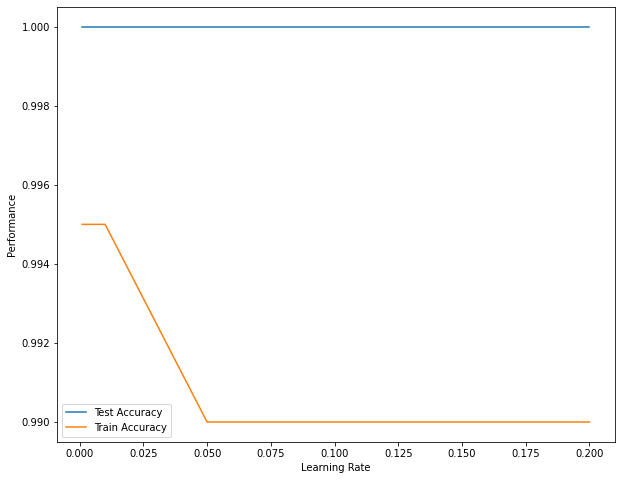

In [ ]:
plt.figure(figsize=(10,8))


#plt.plot(learning_rates,C_test, label='Test Cost')
#plt.plot(learning_rates,C_train, label='Train Cost')
plt.plot(learning_rates,A_test, label='Test Accuracy')
plt.plot(learning_rates,A_train, label='Train Accuracy')

plt.xlabel("Learning Rate")
plt.ylabel("Performance")
plt.legend()
plt.show()

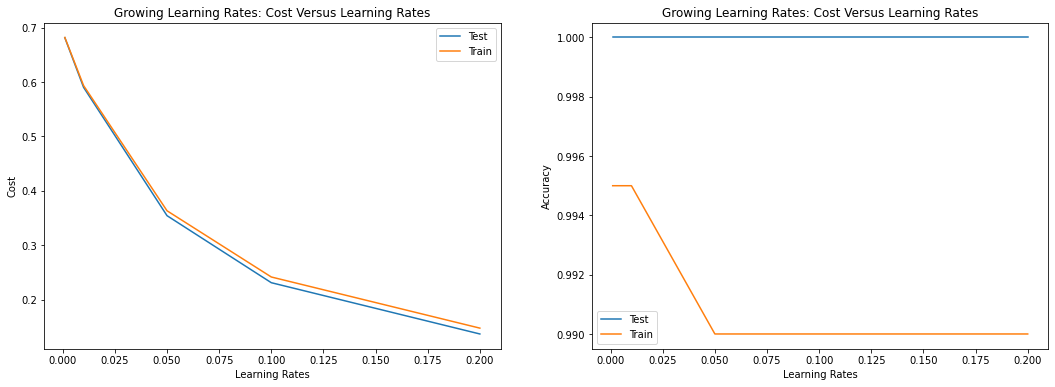

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

axs[0].plot(learning_rates, C_test, label = 'Test')
axs[0].plot(learning_rates, C_train, label = 'Train')
axs[0].set_xlabel("Learning Rates")
axs[0].set_ylabel("Cost")
axs[0].set_title("Growing Learning Rates: Cost Versus Learning Rates")
axs[0].legend()

axs[1].plot(learning_rates, A_test, label = 'Test')
axs[1].plot(learning_rates, A_train, label = 'Train')
axs[1].set_xlabel("Learning Rates")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("Growing Learning Rates: Cost Versus Learning Rates")
axs[1].legend()

plt.savefig("Log_Task3_5.png")

## Extra Experiment: Adding Regularization

In [ ]:
l1_penalty = lambda w: np.sum(np.abs(w))
l2_penalty = lambda w: np.dot(w,w)/2
cost_plus_l2 = lambda w, l, x, y: cost_fn(x, y, w) + l*l2_penalty(w)
cost_plus_l1 = lambda w, l, x, y: cost_fn(x, y, w) + l*l1_penalty(w)

In [ ]:
def gradient_l2(self, x, y, lambdaa):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    grad[1:] += lambdaa * self.w[1:]      
    return grad                         # size D


In [ ]:
class LogisticRegression_L2:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        
    def fit(self, x, y, lambdaa):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape 
        w0 = np.zeros(D)  
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y, lambdaa)

            self.w = self.w - self.learning_rate * g 
            t += 1
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

LogisticRegression_L2.gradient = gradient_l2           

In [ ]:
lam = 3
lmod_reg = LogisticRegression_L2(learning_rate=.05, max_iters=50)
lmod_reg.fit(X_train2,Y_train2, lam)
w = lmod_reg.fit(X_train2,Y_train2, lam).w
print(w)
yh = lmod_reg.fit(X_train2,Y_train2, lam).predict(X_test2)
yh_train = lmod_reg.fit(X_train2,Y_train2, lam).predict(X_train2)

mod_yh = classify(yh)
mod_yh_train = classify(yh_train)

cmat = confusion_matrix(Y_train2, mod_yh_train)
A_train = np.sum(np.diag(cmat))/np.sum(cmat)

cmat = confusion_matrix(Y_test2, mod_yh)
A_test = np.sum(np.diag(cmat))/np.sum(cmat)

C_train = cost_plus_l2(w,lam,x_train_copy, Y_train2)
C_test = cost_plus_l2(w,lam,x_test_copy, Y_test2)

print(A_train, A_test, C_train, C_test)



[ 0.13770551 -0.01216033  0.0136367   0.01141607 -0.01587621  0.02273849
  0.03808433 -0.0523999   0.03259391  0.0274031  -0.05181187  0.04268712
  0.03005917 -0.06467159  0.05289076  0.00736596 -0.0114105   0.02232288
  0.01827834]
0.975 0.96 0.6800502521837833 0.6859052790568928


In [ ]:
reg_list = [0, 0.01, 0.1, 1, 2, 5, 10, 15]
C_test = []
C_train = []
A_test = []
A_train = []

for i, reg_coef in enumerate(reg_list):
    lmod_reg = LogisticRegression_L2(learning_rate=.05, max_iters=50)
    w = lmod_reg.fit(X_train2,Y_train2, reg_coef).w
    yh = lmod_reg.fit(X_train2,Y_train2, reg_coef).predict(X_test2)
    yh_train = lmod_reg.fit(X_train2,Y_train2, reg_coef).predict(X_train2)

    mod_yh = classify(yh)
    mod_yh_train = classify(yh_train)

    cmat = confusion_matrix(Y_train2, mod_yh_train)
    A_train.append(np.sum(np.diag(cmat))/np.sum(cmat))

    cmat = confusion_matrix(Y_test2, mod_yh)
    A_test.append(np.sum(np.diag(cmat))/np.sum(cmat))

    C_train.append(cost_plus_l2(w, reg_coef, x_train_copy, Y_train2))
    C_test.append(cost_plus_l2(w, reg_coef, x_test_copy, Y_test2))


print(A_test)

[1.0, 1.0, 1.0, 1.0, 0.96, 0.88, 0.88, 0.88]


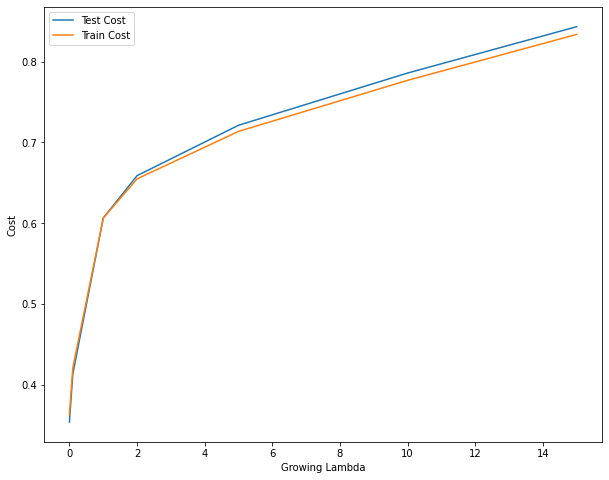

In [ ]:
plt.figure(figsize=(10,8))

plt.plot(reg_list,C_test, label='Test Cost')
plt.plot(reg_list,C_train, label='Train Cost')
#plt.plot(reg_list,A_test, label='Test Accuracy')
#plt.plot(reg_list,A_train, label='Train Accuracy')


plt.xlabel("Growing Lambda")
plt.ylabel("Cost")
plt.legend()
plt.show()

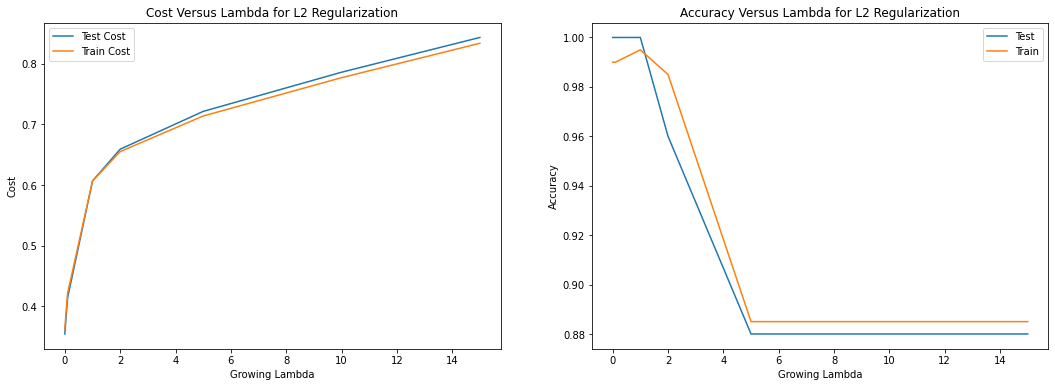

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
xaxis = np.arange(0.2, 0.8, 0.1).tolist()

axs[0].plot(reg_list,C_test, label='Test Cost')
axs[0].plot(reg_list,C_train, label='Train Cost')
axs[0].set_xlabel("Growing Lambda")
axs[0].set_ylabel("Cost")
axs[0].set_title("Cost Versus Lambda for L2 Regularization")
axs[0].legend()

axs[1].plot(reg_list, A_test, label = 'Test')
axs[1].plot(reg_list, A_train, label = 'Train')
axs[1].set_xlabel("Growing Lambda")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("Accuracy Versus Lambda for L2 Regularization")
axs[1].legend()

plt.savefig("d2_reg.png")

In [ ]:
def gradient_l1(self, x, y, lambdaa):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    grad[1:] += lambdaa * np.sign(self.w[1:])      

    return grad   


In [ ]:
class LogisticRegression_L1:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        
    def fit(self, x, y, lambdaa):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape 
        w0 = np.zeros(D)  
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y, lambdaa)
            #print(g)

            self.w = self.w - self.learning_rate * g 
            t += 1
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

LogisticRegression_L1.gradient = gradient_l1          

In [ ]:
lam = 3
lmod_reg = LogisticRegression_L1(learning_rate=.05, max_iters=50)
lmod_reg.fit(X_train2,Y_train2, lam)
w = lmod_reg.fit(X_train2,Y_train2, lam).w
yh = lmod_reg.fit(X_train2,Y_train2, lam).predict(X_test2)
yh_train = lmod_reg.fit(X_train2,Y_train2, lam).predict(X_train2)

mod_yh = classify(yh)
mod_yh_train = classify(yh_train)

cmat = confusion_matrix(Y_train2, mod_yh_train)
A_train = np.sum(np.diag(cmat))/np.sum(cmat)

cmat = confusion_matrix(Y_test2, mod_yh)
A_test = np.sum(np.diag(cmat))/np.sum(cmat)

C_train = cost_plus_l1(w,lam,x_train_copy, Y_train2)
C_test = cost_plus_l1(w,lam,x_test_copy, Y_test2)

print(A_train, A_test, C_train, C_test)



0.46 0.46 4.23752050481175 4.251292944074017


In [ ]:
reg_list = [0, 0.01, 0.1, 1]

for i, reg_coef in enumerate(reg_list):
    lmod_reg = LogisticRegression_L1(learning_rate=.05, max_iters=50)
    w = lmod_reg.fit(X_train2,Y_train2, reg_coef).w
    yh = lmod_reg.fit(X_train2,Y_train2, reg_coef).predict(X_test2)
    yh_train = lmod_reg.fit(X_train2,Y_train2, reg_coef).predict(X_train2)

    mod_yh = classify(yh)
    mod_yh_train = classify(yh_train)

    cmat = confusion_matrix(Y_train2, mod_yh_train)
    A_train = np.sum(np.diag(cmat))/np.sum(cmat)

    cmat = confusion_matrix(Y_test2, mod_yh)
    A_test = np.sum(np.diag(cmat))/np.sum(cmat)

    C_train = cost_plus_l1(w, reg_coef, x_train_copy, Y_train2)
    C_test = cost_plus_l1(w, reg_coef, x_test_copy, Y_test2)

    print(A_train, A_test, C_train, C_test)



0.99 1.0 0.363279249943283 0.3542572621332838
0.99 1.0 0.4121808979914723 0.4034218572773153
0.995 1.0 0.6569424367654384 0.6587854016314635
0.375 0.22 1.3762817346341942 1.3911142325638948
